<a id="1"></a>
<h1 style="text-align: center; font-family: 'Georgia', serif; font-weight: bold; color: #0B3D91; background-color: #E3F2FD; padding: 15px; border-radius: 8px;">
  📖 Importing Libraries
</h1>


In [1]:
!pip install pywaffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from scipy import stats
from scipy.stats.mstats import winsorize

from pywaffle import Waffle

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import math


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score,classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from scipy import stats




import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 68.4 MB/s eta 0:00:00


<a id="2"></a>
<h1 style="text-align: center; font-family: 'Georgia', serif; font-weight: bold; color: #0B3D91; background-color: #E3F2FD; padding: 15px; border-radius: 8px;">
  📊 Data Exploration
</h1>


In [2]:
df = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
df = df.copy()
pd.set_option('display.max_columns', 100)
df.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  Ease of Online booking  Gate location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   Food and drink  Online boarding  Seat comfort  Inflight entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied

In [3]:
def null_summary(df):
    null_counts = df.isnull().sum().to_frame('Missing Values')
    return null_counts.style.applymap(lambda v: 'background-color: #E3F2FD' if v > 0 else 'background-color: white')
null_summary(df)


In [4]:
df.duplicated().sum()

0

<h2 style="font-family: 'Georgia', serif; color: #0B3D91;">Summary:</h2>
<ol style="font-family: 'Georgia', serif; color: #333;">
  <li>Dataset contains <strong>103904</strong> rows and <strong>25</strong> columns </li>
  <li>There is  missing values <strong>Arrival Delay</strong> column (310 missing values)  i will impute it with median.</li>
  <li>The first column (<strong>ID</strong>) and (<strong>Unnamed</strong>) columns seem useless and would not affect the analysis.</li>
  <li>No duplicates were found in the dataset.</li>
</ol>

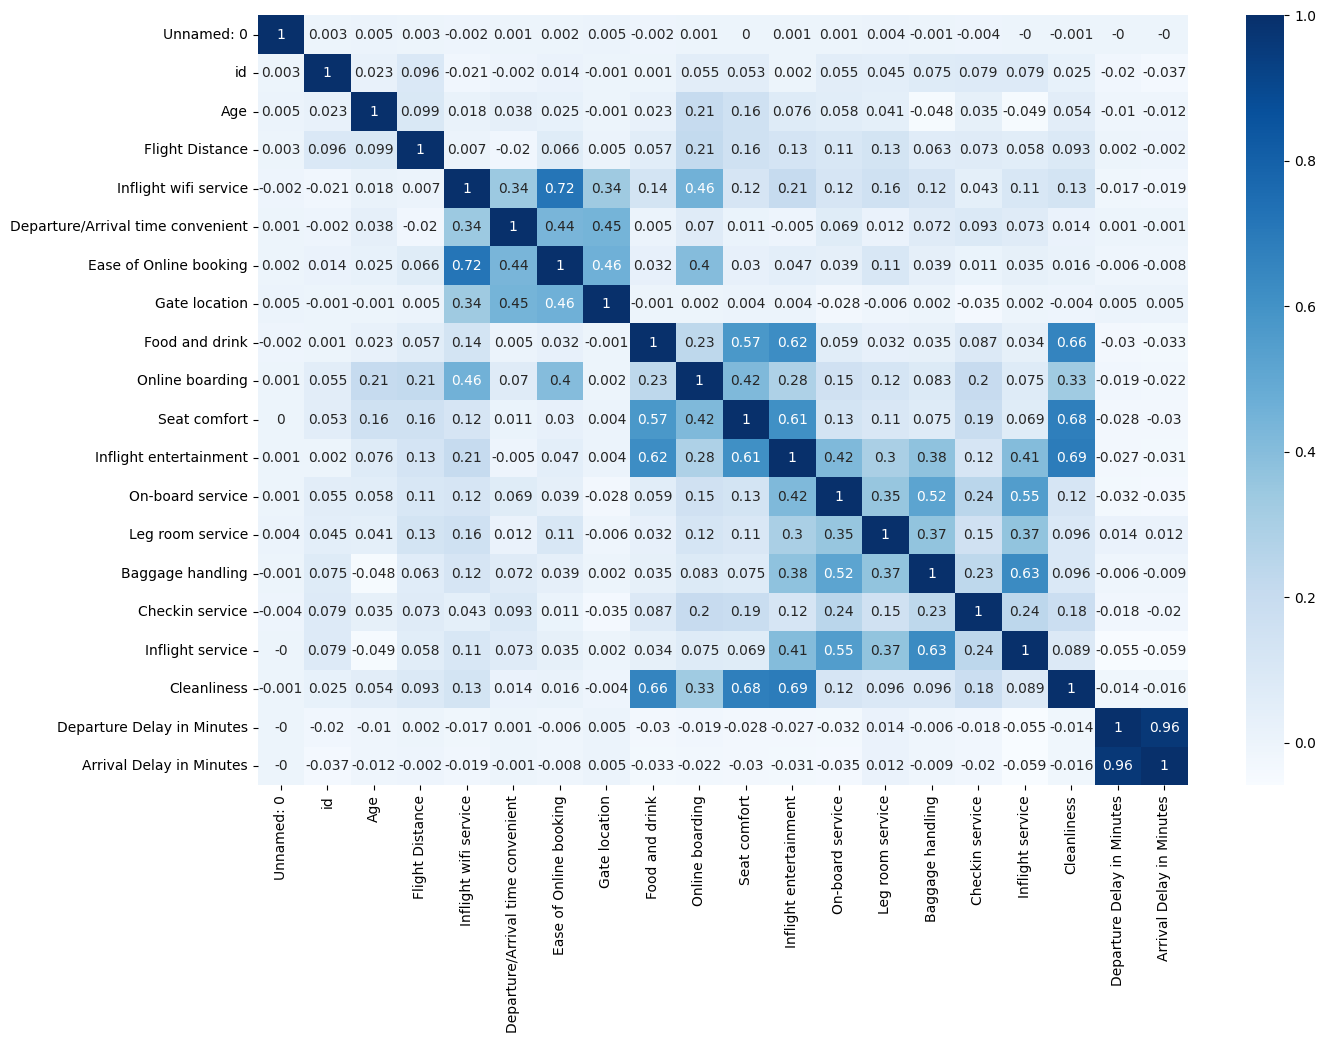

In [5]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(15, 10))
sns.heatmap(round(numeric_df.corr(), 3), annot=True, cmap='Blues')

plt.show()


<p style="font-family: 'Georgia', serif; font-size: 16px; color: #333; padding: 10px; border-left: 5px solid #0B3D91; border-radius: 8px;">
  <strong>Departure Delay</strong> and <strong>Arrival Delay</strong> columns are highly positively correlated.
</p>



<a id="data-cleaning"></a>
<h2 style="text-align: center; font-family: 'Georgia', serif; font-weight: bold; color: #0B3D91; background-color: #E3F2FD; padding: 15px; border-radius: 8px;">
  🧹 Data Cleaning
</h2>


<p style="font-family: 'Georgia', serif; font-size: 16px; color: #333; padding: 10px; border-left: 5px solid #0B3D91; border-radius: 8px;">
  <strong>Drop with</strong> <strong>uselesscolumns</strong>
</p>


In [6]:
df = df.drop(['Unnamed: 0','id'],axis=1)

In [7]:
df.head()

Gender      Customer Type  Age   Type of Travel     Class  Flight Distance  \
0    Male     Loyal Customer   13  Personal Travel  Eco Plus              460   
1    Male  disloyal Customer   25  Business travel  Business              235   
2  Female     Loyal Customer   26  Business travel  Business             1142   
3  Female     Loyal Customer   25  Business travel  Business              562   
4    Male     Loyal Customer   61  Business travel  Business              214   

   Inflight wifi service  Departure/Arrival time convenient  \
0                      3                                  4   
1                      3                                  2   
2                      2                                  2   
3                      2                                  5   
4                      3                                  3   

   Ease of Online booking  Gate location  Food and drink  Online boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   Seat comfort  Inflight entertainment  On-board service  Leg room service  \
0             5                       5                 4                 3   
1             1                       1                 1                 5   
2             5                       5                 4                 3   
3             2                       2                 2                 5   
4             5                       3                 3                 4   

   Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied

In [8]:
df.describe()

Age  Flight Distance  Inflight wifi service  \
count  103904.000000    103904.000000          103904.000000   
mean       39.379706      1189.448375               2.729683   
std        15.114964       997.147281               1.327829   
min         7.000000        31.000000               0.000000   
25%        27.000000       414.000000               2.000000   
50%        40.000000       843.000000               3.000000   
75%        51.000000      1743.000000               4.000000   
max        85.000000      4983.000000               5.000000   

       Departure/Arrival time convenient  Ease of Online booking  \
count                      103904.000000           103904.000000   
mean                            3.060296                2.756901   
std                             1.525075                1.398929   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       Gate location  Food and drink  Online boarding   Seat comfort  \
count  103904.000000   103904.000000    103904.000000  103904.000000   
mean        2.976883        3.202129         3.250375       3.439396   
std         1.277621        1.329533         1.349509       1.319088   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       Inflight entertainment  On-board service  Leg room service  \
count           103904.000000     103904.000000     103904.000000   
mean                 3.358158          3.382363          3.351055   
std                  1.332991          1.288354          1.315605   
min                  0.000000          0.000000          0.000000   
25%                  2.000000          2.000000          2.000000   
50%                  4.000000          4.000000          4.000000   
75%                  4.000000          4.000000          4.000000   
max                  5.000000          5.000000          5.000000   

       Baggage handling  Checkin service  Inflight service    Cleanliness  \
count     103904.000000    103904.000000     103904.000000  103904.000000   
mean           3.631833         3.304290          3.640428       3.286351   
std            1.180903         1.265396          1.175663       1.312273   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       Departure Delay in Minutes  Arrival Delay in Minutes  
count               103904.000000             103594.000000  
mean                    14.815618                 15.178678  
std                     38.230901                 38.698682  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

<a id="numerical-columns"></a>
<h2 style="text-align: center; font-family: 'Georgia', serif; font-weight: bold; color: #0B3D91; background-color: #E3F2FD; padding: 15px; border-radius: 8px;">
  📊 Summary Statistics
</h2>

<ul style="font-family: 'Georgia', serif; font-size: 16px; color: #333; background-color: #F0F8FF; padding: 15px; border-radius: 8px; list-style-type: none; border: 1px solid #0B3D91;">
  <li><strong>Arrival Delay Column:</strong></li>
  <ul>
    <li>The minimum arrival delay is <strong>0</strong> (indicating no delay).</li>
    <li>The maximum arrival delay is <strong>1584</strong>.</li>
  </ul>
  
  <li><strong>Flight Distance Column:</strong></li>
  <ul>
    <li>The shortest flight distance in the dataset is <strong>31</strong>.</li>
    <li>The longest flight distance in the dataset is <strong>4983</strong>.</li>
  </ul>
  
  <li><strong>Departure Delay Column:</strong></li>
  <ul>
    <li>The minimum departure delay is <strong>0</strong>.</li>
    <li>The maximum departure delay is <strong>1592</strong>.</li>
  </ul>
  
  <li><strong>Note:</strong></li>
  <ul>
    <li>There appears to be outliers in the data as there is a significant difference between the third quartile (Q3) and the maximum value.</li>
  </ul>
</ul>


<p style="font-family: 'Georgia', serif; font-size: 16px; color: #333; padding: 10px; border-left: 5px solid #0B3D91; border-radius: 8px;">
 <strong>Check outliers</strong>
</p>


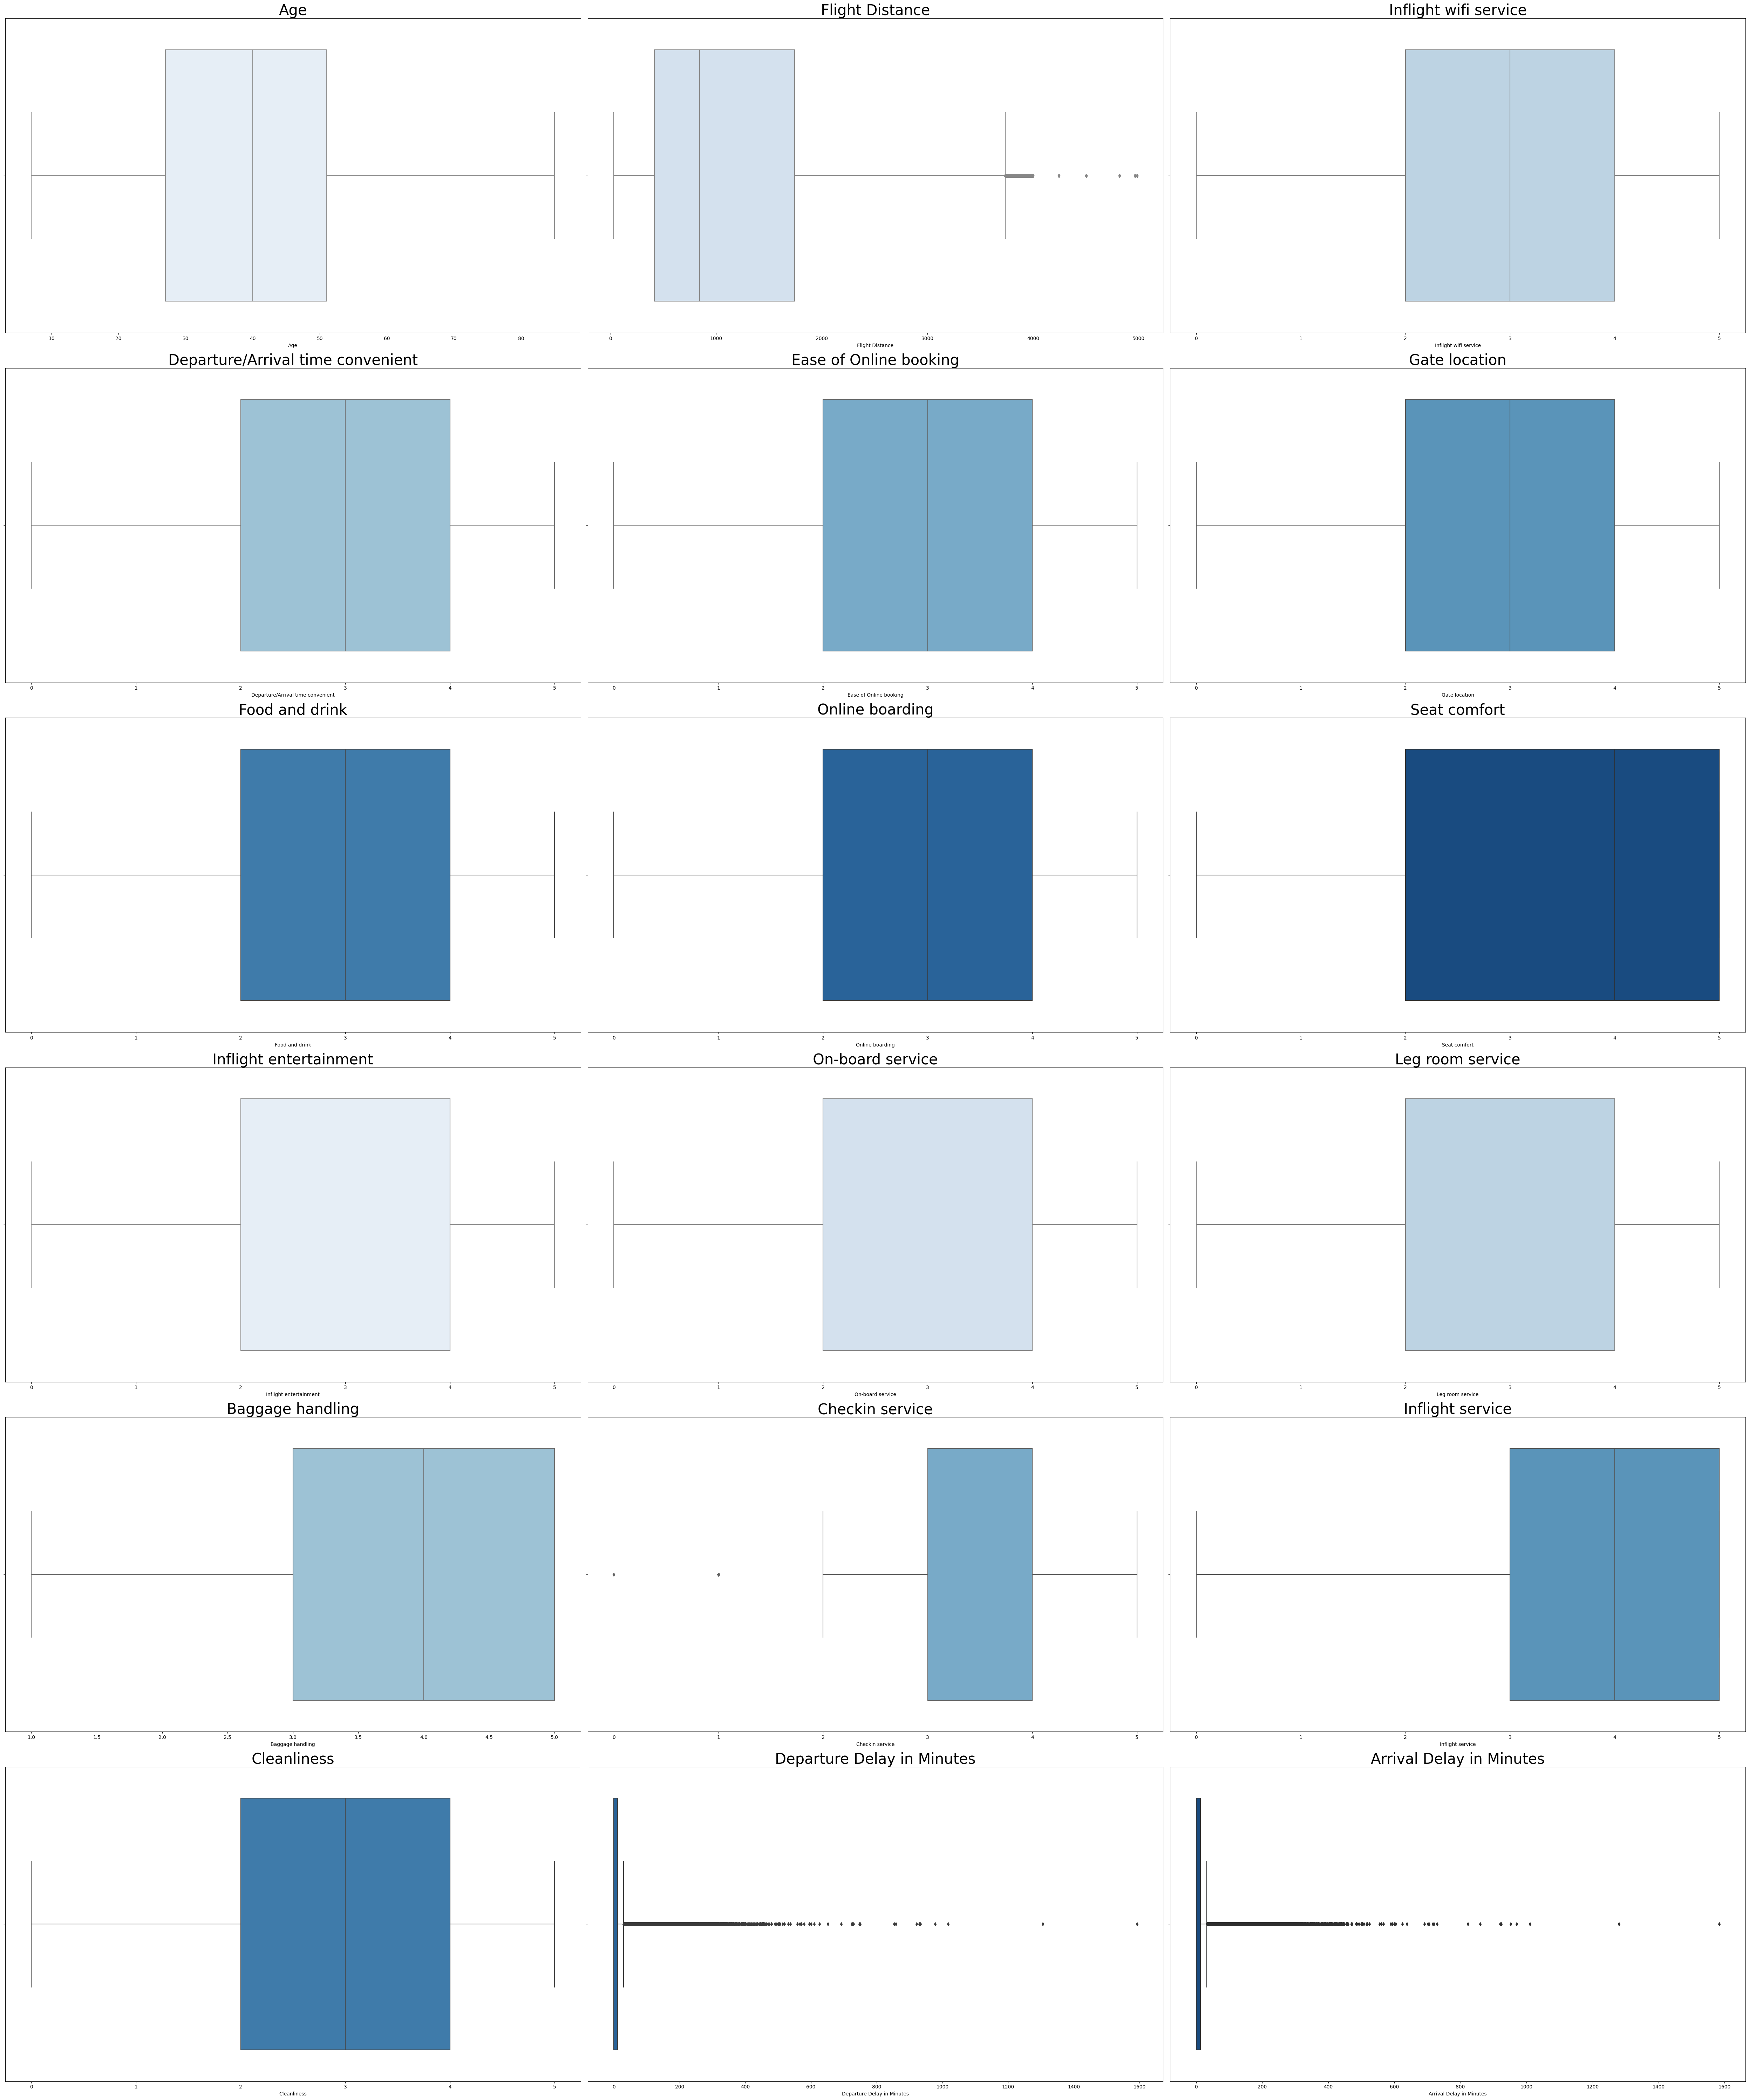

In [9]:
numerical = df.select_dtypes(include=['int', 'float']).copy()
rows, cols = 6, 3
blue_palette = sns.color_palette("Blues", n_colors=9)

fig, axes = plt.subplots(rows, cols, figsize=(50, 60))
axes = axes.flatten()

for i, col in enumerate(numerical.columns):
    if i < len(axes):
        sns.boxplot(x=df[col], ax=axes[i], color=blue_palette[i % len(blue_palette)])
        axes[i].set_title(col, fontsize=30)

plt.tight_layout()
plt.show()


In [10]:
def handle_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    return df

columns_to_handel= ['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
df = handle_outliers(df, columns_to_handel)

<h2 style="text-align: left; font-family: 'Georgia', serif; font-weight: bold; color: #0B3D91; background-color: #E3F2FD; padding: 15px; border-radius: 8px;">
  🔍 There is outliers in
</h2>

<ul style="font-family: 'Georgia', serif; font-size: 16px; color: #333; background-color: #F0F8FF; padding: 15px; border-radius: 8px; list-style-type: none; border: 1px solid #0B3D91;">
  <li><strong>Flight Distance</strong></li>
  <li><strong>Departure Delay in Minutes</strong></li>
  <li><strong>Arrival Delay in Minutes</strong></li>
</ul>


<h2 style="text-align: left; font-family: 'Georgia', serif; font-weight: bold; color: #0B3D91; background-color: #E3F2FD; padding: 15px; border-radius: 8px;">
  🔍Handeling null & Outliers
</h2>

In [11]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [12]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

<a id="data-cleaning"></a>
<h2 style="text-align: center; font-family: 'Georgia', serif; font-weight: bold; color: #0B3D91; background-color: #E3F2FD; padding: 15px; border-radius: 8px;">
  🔍Exloratory Data Analysis
</h2>


In [13]:
columns_with_six_unique = df.columns[df.nunique() == 6]
columns_with_six_unique

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Checkin service',
       'Inflight service', 'Cleanliness'],
      dtype='object')

In [14]:
import pandas as pd


# Copy DataFrame
df_ord = df.copy()

# Updated Mapping Dictionary for 6 Categories
ordinal_mapping = {
    0: "Very Poor",
    1: "Poor",
    2: "Average",
    3: "Good",
    4: "Excellent",
    5: "Outstanding"  # Add the 6th category here
}

# Columns to Convert
columns_to_convert = ['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Checkin service',
       'Inflight service', 'Cleanliness']

# Convert numeric values to strings
df_ord[columns_to_convert] = df_ord[columns_to_convert].applymap(lambda x: ordinal_mapping.get(x, x))


In [15]:
# Updated Mapping Dictionary for 6 Categories
ordinal_mapping = {
    0: "Very Poor",
    1: "Poor",
    2: "Average",
    3: "Good",
    4: "Excellent",
}
df_ord['Baggage handling'] = df_ord['Baggage handling'].apply(lambda x: ordinal_mapping.get(x, x))

In [16]:
df_ord['Inflight wifi service'].unique()

array(['Good', 'Average', 'Excellent', 'Poor', 'Outstanding', 'Very Poor'],
      dtype=object)

In [17]:
df_ord.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  float64
 6   Inflight wifi service              103904 non-null  object 
 7   Departure/Arrival time convenient  103904 non-null  object 
 8   Ease of Online booking             103904 non-null  object 
 9   Gate location                      103904 non-null  object 
 10  Food and drink                     103904 non-null  object 
 11  Online boarding                    1039

In [18]:
df_ord

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance Inflight wifi service  \
0                 460.0                  Good   
1                 235.0                  Good   
2                1142.0               Average   
3                 562.0               Average   
4                 214.0                  Good   
...                 ...                   ...   
103899            192.0               Average   
103900           2347.0             Excellent   
103901           1995.0                  Poor   
103902           1000.0                  Poor   
103903           1723.0                  Poor   

       Departure/Arrival time convenient Ease of Online booking Gate location  \
0                              Excellent                   Good          Poor   
1                                Average                   Good          Good   
2                                Average                Average       Average   
3                            Outstanding            Outstanding   Outstanding   
4                                   Good                   Good          Good   
...                                  ...                    ...           ...   
103899                              Poor                Average          Good   
103900                         Excellent              Excellent     Excellent   
103901                              Poor                   Poor          Good   
103902                              Poor                   Poor   Outstanding   
103903                              Good                   Good          Good   

       Food and drink Online boarding Seat comfort Inflight entertainment  \
0         Outstanding            Good  Outstanding            Outstanding   
1                Poor            Good         Poor                   Poor   
2         Outstanding     Outstanding  Outstanding            Outstanding   
3             Average         Average      Average                Average   
4           Excellent     Outstanding  Outstanding                   Good   
...               ...             ...          ...                    ...   
103899        Average         Average      Average                Average   
103900        Average       Excellent  Outstanding            Outstanding   
103901      Excellent            Poor  Outstanding              Excellent   
103902           Poor            Poor         Poor                   Poor   
103903           Poor            Poor         Poor                   Poor   

       On-board service Leg room service Baggage handling Checkin service  \
0             Excellent             Good        Excellent       Excellent   
1                  Poor      Outstanding             Good            Poor   
2             Excellent             Good        Excellent       Excellent   
3               Average      Outstanding             Good            Poor   
4                  Good        Excellent        Excellent            Good   
...                 ...              ...              ...             ...   
103899             Good             Poor        Excellent         Average   
103900      Outstanding      Outstanding                5     Outstanding   

In [19]:
df_ord['age_cat'] = pd.cut(df_ord['Age'], bins = [13,18, 45,60,85], labels = ['Teens', 'Adults','Mid Adults','elders'])

In [20]:
bins = [0, 500, 1500, 3000, 5000]  # Adjust these values based on your needs
labels = ['Very Short', 'Short', 'Medium', 'Long']

# Create the 'Flight Distance' categories
df_ord['flight_distance_cat'] = pd.cut(df_ord['Flight Distance'], bins=bins, labels=labels, include_lowest=True)


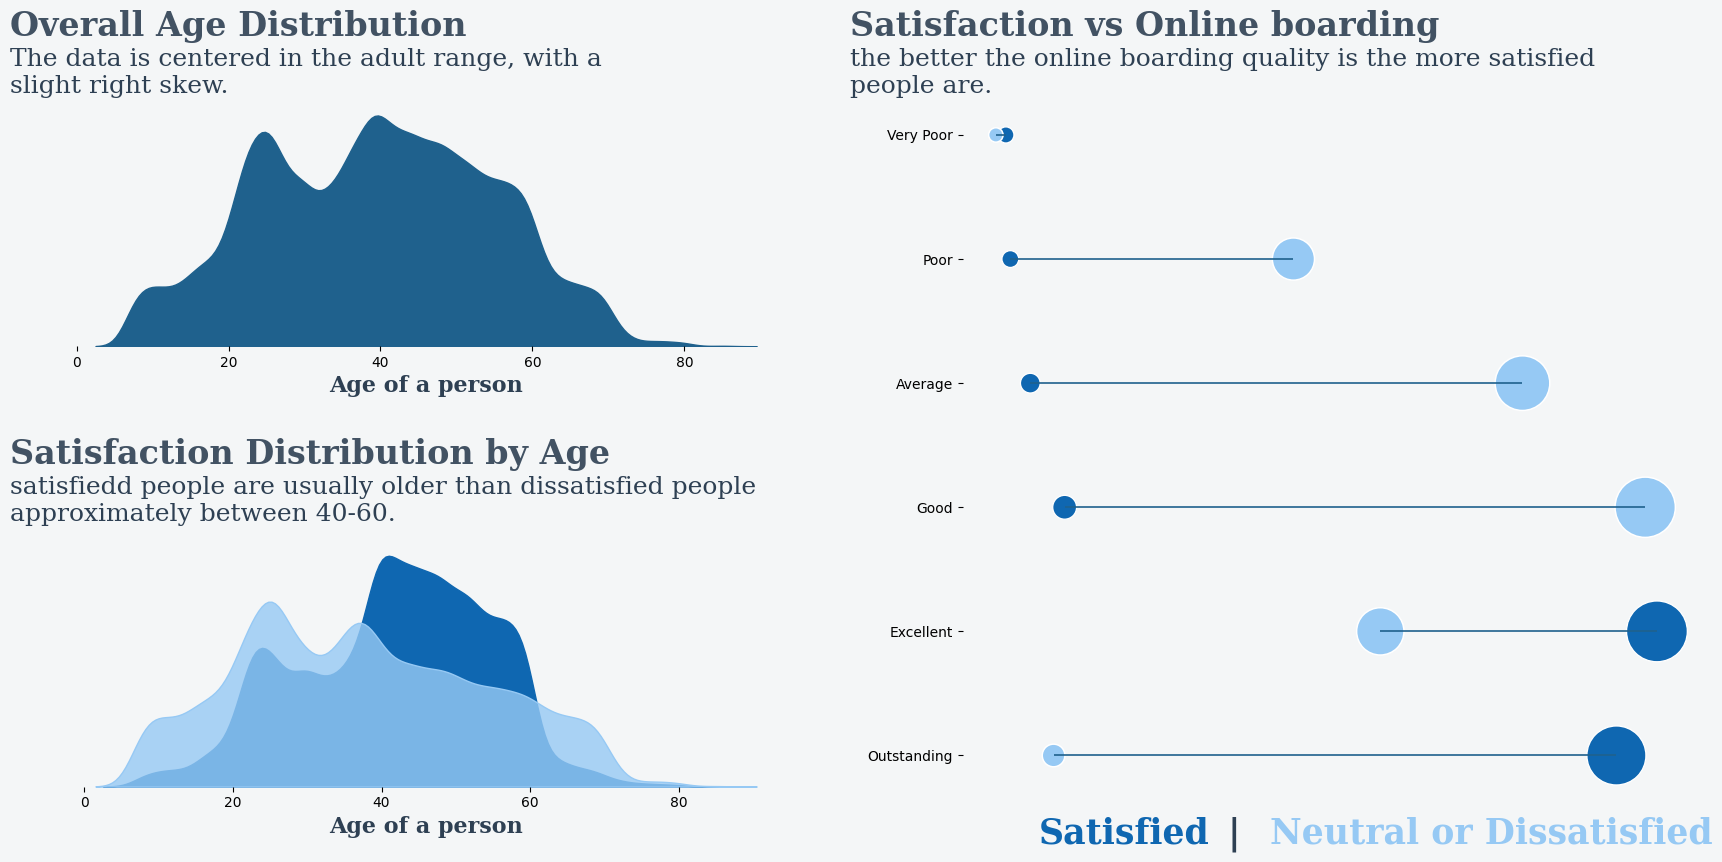

In [21]:
# Define new color scheme
attrition_color = '#0F67B1'
retention_color = '#96C9F4'


satisfaction_color = '#0F67B1'  # Satisfaction
neutral_color = '#96C9F4'  # Neutral (Using retention color as neutral)
dissatisfaction_color = '#96C9F4'  # Dissatisfaction
background_color = '#F4F6F7'  # Light Gray (Background)
accent_color = '#1F618D'  # Navy Blue (Accent)
text_color = '#2E4053'  # Dark Charcoal (Text)
, retention_color
fig = plt.figure(figsize=(21, 9.5), dpi=100)

gs = fig.add_gridspec(15, 24)
gs.update(wspace=1, hspace=0.05)

ax2 = fig.add_subplot(gs[1:6, 0:11])  # Distribution plot
ax3 = fig.add_subplot(gs[10:15, 0:11])  # Hue distribution plot
ax1 = fig.add_subplot(gs[1:15, 13:])  # Dumbbell plot

# Axes list
axes = [ax1, ax2, ax3]

# Setting axes; turning off visibility of axes and spines
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor(background_color)

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor(background_color)

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# KDE plot of overall age distribution
sns.kdeplot(data=df_ord, x='Age', ax=ax2, shade=True, alpha=1, color=accent_color)

# KDE plots for satisfaction categories
sns.kdeplot(data=df_ord[df_ord['satisfaction'] == 'satisfied'], x='Age', ax=ax3, shade=True, alpha=1, color=satisfaction_color)
sns.kdeplot(data=df_ord[df_ord['satisfaction'] == 'neutral or dissatisfied'], x='Age', ax=ax3, shade=True, alpha=0.8, color=neutral_color)


online_boarding_order = ['Very Poor', 'Poor', 'Average', 'Good', 'Excellent','Outstanding']
# Define counts of Flight Distance for each Online Boarding and Satisfaction category
satisfaction_counts = df_ord[df_ord['satisfaction'] == 'satisfied']['Online boarding'].value_counts().reindex(online_boarding_order, fill_value=0)
neutral_dissatisfied_counts = df_ord[df_ord['satisfaction'] == 'neutral or dissatisfied']['Online boarding'].value_counts().reindex(online_boarding_order, fill_value=0)

# Create empty lists for plotting
satisfaction_x = satisfaction_counts.values
neutral_dissatisfied_x = neutral_dissatisfied_counts.values
y_labels = online_boarding_order

# Plot horizontal lines and scatterplots
ax1.hlines(y=y_labels, xmin=satisfaction_x, xmax=neutral_dissatisfied_x, color=accent_color, linewidth=1.2)

sns.scatterplot(y=y_labels, x=satisfaction_x, s=[x * 0.1 for x in satisfaction_x], color=satisfaction_color, ax=ax1, alpha=1)
sns.scatterplot(y=y_labels, x=neutral_dissatisfied_x, s=[x * 0.1 for x in neutral_dissatisfied_x], color=dissatisfaction_color, ax=ax1, alpha=1)


# Set x-labels for the plots
ax2.set_xlabel('Age of a person', fontdict={'font':'Serif', 'color': text_color, 'size': 16, 'weight':'bold'})
ax3.set_xlabel('Age of a person', fontdict={'font':'Serif', 'color': text_color, 'weight':'bold', 'size': 16})

# Text Annotations using fig.text
fig.text(0.1, 0.9, 'Overall Age Distribution', {'font':'Serif', 'color': text_color, 'weight':'bold', 'size': 24}, alpha=0.9)
fig.text(0.1, 0.84, 'The data is centered in the adult range, with a\nslight right skew.',
         {'font':'Serif', 'size':'18', 'color': text_color})

fig.text(0.1, 0.45, 'Satisfaction Distribution by Age', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size': 24}, alpha=0.9)
fig.text(0.1, 0.39, 'satisfiedd people are usually older than dissatisfied people \napproximately between 40-60.',
         {'font':'Serif', 'color': text_color, 'size': 18})

fig.text(0.5, 0.9, 'Satisfaction vs Online boarding', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size': 24}, alpha=0.9)
fig.text(0.5, 0.84, 'the better the online boarding quality is the more satisfied \npeople are.',
         {'font':'Serif', 'color': text_color, 'size': 18})

fig.text(0.59, 0.05, 'Satisfied', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': satisfaction_color})
fig.text(0.68, 0.05, '|', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': text_color})
fig.text(0.7, 0.05, 'Neutral or Dissatisfied', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': dissatisfaction_color})

plt.savefig('satisfaction_plot.png', dpi=300, bbox_inches='tight')
fig.show()


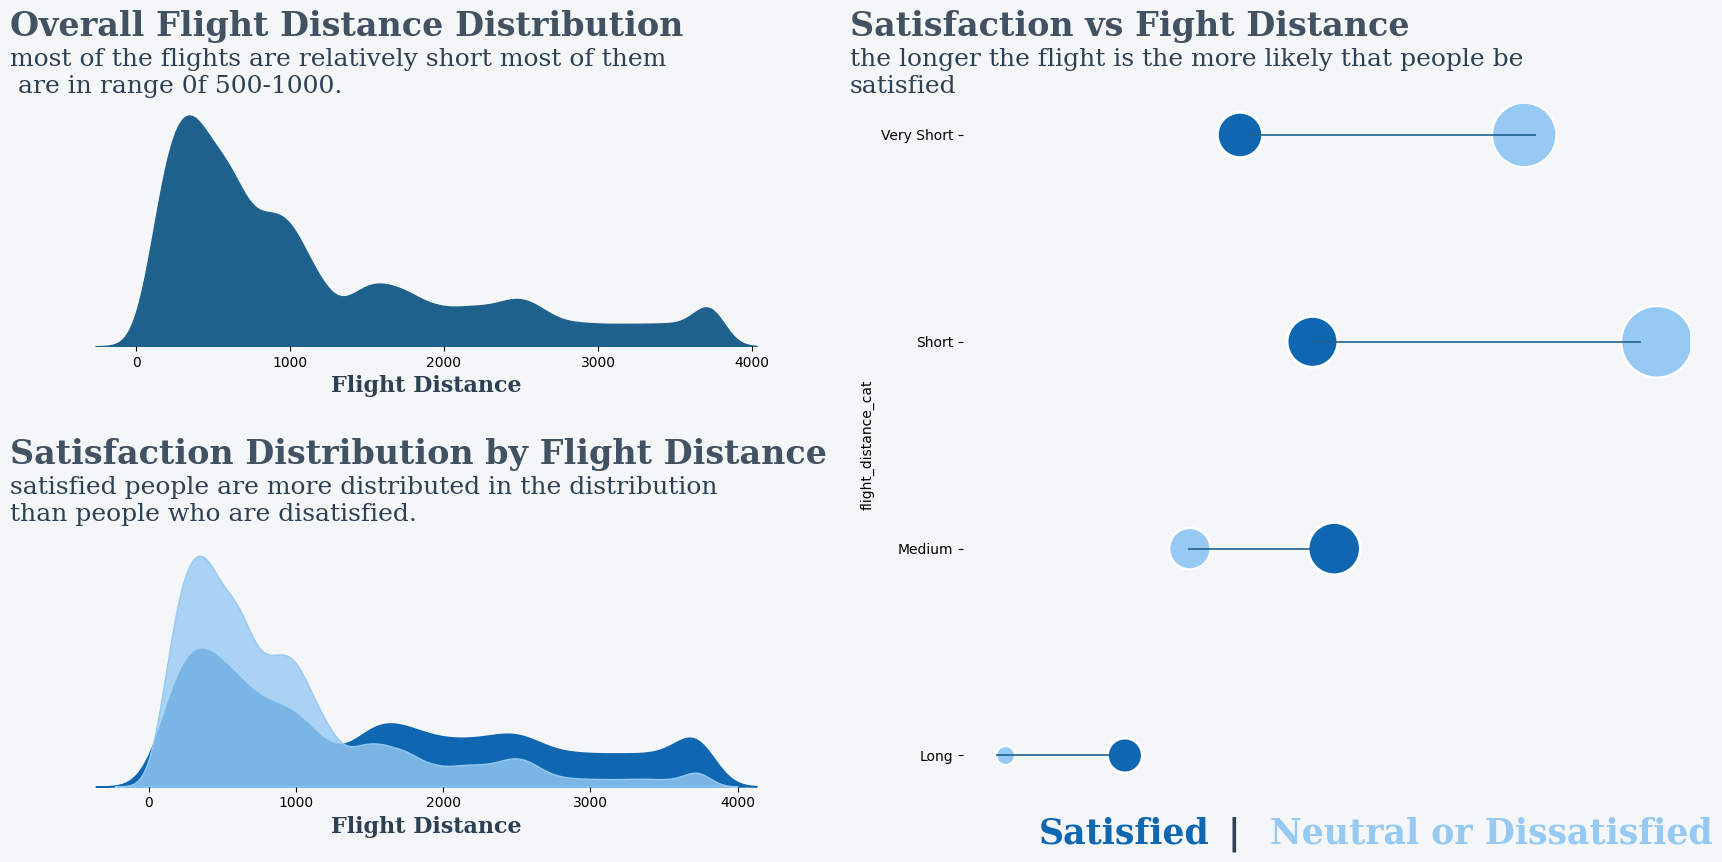

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define new color scheme
satisfaction_color = '#0F67B1'  # Satisfaction
neutral_color = '#96C9F4'  # Neutral (Using retention color as neutral)
dissatisfaction_color = '#96C9F4'  # Dissatisfaction
background_color = '#F4F6F7'  # Light Gray (Background)
accent_color = '#1F618D'  # Navy Blue (Accent)
text_color = '#2E4053'  # Dark Charcoal (Text)

fig = plt.figure(figsize=(21, 9.5), dpi=100)

gs = fig.add_gridspec(15, 24)
gs.update(wspace=1, hspace=0.05)

ax2 = fig.add_subplot(gs[1:6, 0:11])  # Distribution plot
ax3 = fig.add_subplot(gs[10:15, 0:11])  # Hue distribution plot
ax1 = fig.add_subplot(gs[1:15, 13:])  # Dumbbell plot

# Axes list
axes = [ax1, ax2, ax3]

# Setting axes; turning off visibility of axes and spines
for ax in axes:
    ax.axes.get_yaxis().set_visible(False)
    ax.set_facecolor(background_color)

    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)

fig.patch.set_facecolor(background_color)

ax1.axes.get_xaxis().set_visible(False)
ax1.axes.get_yaxis().set_visible(True)

# KDE plot of overall flight distance distribution
sns.kdeplot(data=df_ord, x='Flight Distance', ax=ax2, shade=True, alpha=1, color=accent_color)

# KDE plots for satisfaction categories
sns.kdeplot(data=df_ord[df_ord['satisfaction'] == 'satisfied'], x='Flight Distance', ax=ax3, shade=True, alpha=1, color=satisfaction_color)
sns.kdeplot(data=df_ord[df_ord['satisfaction'] == 'neutral or dissatisfied'], x='Flight Distance', ax=ax3, shade=True, alpha=0.8, color=neutral_color)

# Define the order of Online boarding ratings
# Define satisfaction level counts
satisfied_count = df_ord[df_ord['satisfaction'] == 'satisfied'].flight_distance_cat.value_counts()
neutral_dissatisfied_count = df_ord[df_ord['satisfaction'] == 'neutral or dissatisfied'].flight_distance_cat.value_counts()

# Plot horizontal lines connecting the satisfaction and neutral/dissatisfied counts
ax1.hlines(y=['Very Short', 'Short', 'Medium', 'Long'],
           xmin=[22000, 26000, 8800, 6000], xmax=[11000, 13500, 13500, 1500],
           color=accent_color, linewidth=1.2)  # Thicker lines for better visibility

# Scatterplot for 'satisfied' counts
sns.scatterplot(y=satisfied_count.index, x=satisfied_count.values,
                s=satisfied_count.values * 0.1, color=satisfaction_color,
                ax=ax1, alpha=1)  # Increased dot sizes

# Scatterplot for 'neutral or dissatisfied' counts
sns.scatterplot(y=neutral_dissatisfied_count.index, x=neutral_dissatisfied_count.values,
                s=neutral_dissatisfied_count.values * 0.1, color=dissatisfaction_color,
                ax=ax1, alpha=1)  # Increased dot sizes
# Set x-labels for the plots
ax2.set_xlabel('Flight Distance', fontdict={'font':'Serif', 'color': text_color, 'size': 16, 'weight':'bold'})
ax3.set_xlabel('Flight Distance', fontdict={'font':'Serif', 'color': text_color, 'weight':'bold', 'size': 16})

# Text Annotations using fig.text
fig.text(0.1, 0.9, 'Overall Flight Distance Distribution', {'font':'Serif', 'color': text_color, 'weight':'bold', 'size': 24}, alpha=0.9)
fig.text(0.1, 0.84, 'most of the flights are relatively short most of them\n are in range 0f 500-1000.',
         {'font':'Serif', 'size':'18', 'color': text_color})

fig.text(0.1, 0.45, 'Satisfaction Distribution by Flight Distance', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size': 24}, alpha=0.9)
fig.text(0.1, 0.39, 'satisfied people are more distributed in the distribution\nthan people who are disatisfied.',
         {'font':'Serif', 'color': text_color, 'size': 18})

fig.text(0.5, 0.9, 'Satisfaction vs Fight Distance', {'font':'Serif', 'weight':'bold', 'color': text_color, 'size': 24}, alpha=0.9)
fig.text(0.5, 0.84, 'the longer the flight is the more likely that people be \nsatisfied',
         {'font':'Serif', 'color': text_color, 'size': 18})

fig.text(0.59, 0.05, 'Satisfied', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': satisfaction_color})
fig.text(0.68, 0.05, '|', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': text_color})
fig.text(0.7, 0.05, 'Neutral or Dissatisfied', {'font': 'Serif', 'weight': 'bold', 'size': '25', 'color': dissatisfaction_color})

plt.savefig('satisfaction_vs_online_boarding_plot.png', dpi=300, bbox_inches='tight')
fig.show()


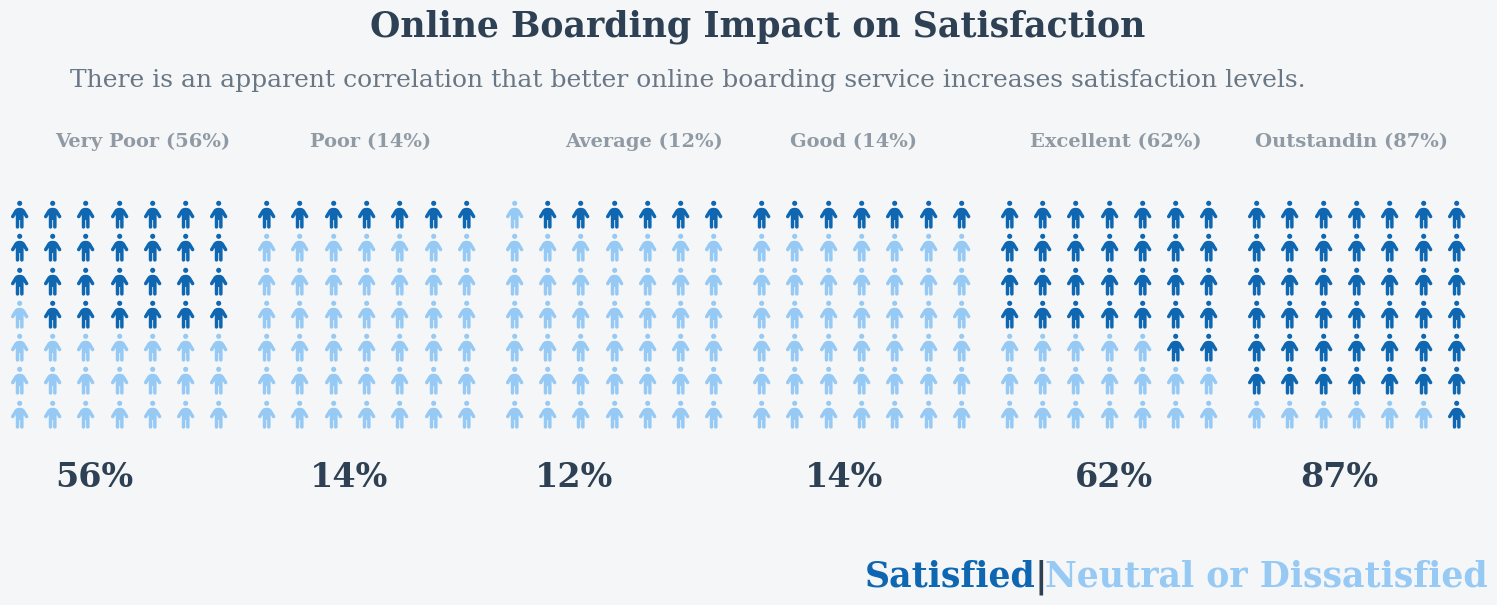

In [23]:
Online_boarding = df_ord['Online boarding'].value_counts().sort_index()
dissatisfied_ob = df_ord[df_ord['satisfaction'] == 'neutral or dissatisfied']['Online boarding'].value_counts().sort_index()
satisfied_ob = df_ord[df_ord['satisfaction'] == 'satisfied']['Online boarding'].value_counts().sort_index()

Excellent = Online_boarding.get(1, 0)
Good = Online_boarding.get(2, 0)
Outstanding = Online_boarding.get(3, 0)
average = Online_boarding.get(0, 0)
poor = Online_boarding.get(4, 0)
Very_Poor = Online_boarding.get(5, 0)


satisied_Excellent = int(round(satisfied_ob.get(1, 0) / Excellent * 100, 0))
satisied_good = int(round(satisfied_ob.get(2, 0) / Good * 100, 0))
satisied_Outstanding = int(round(satisfied_ob.get(3, 0) / Outstanding * 100, 0))
satisied_average = int(round(satisfied_ob.get(0, 0) / average * 100, 0))
satisied_poor = int(round(satisfied_ob.get(4, 0) / poor * 100, 0))
satisied_Very_Poor = int(round(satisfied_ob.get(5, 0) / Very_Poor * 100, 0))

dissatisied_Excellent = int(round(dissatisfied_ob.get(1, 0) / Excellent * 100, 0))
dissatisied_good = int(round(dissatisfied_ob.get(2, 0) / Good * 100, 0))
dissatisied_Outstanding = int(round(dissatisfied_ob.get(3, 0) / Outstanding * 100, 0))
dissatisied_average = int(round(dissatisfied_ob.get(0, 0) / average * 100, 0))
dissatisied_poor = int(round(dissatisfied_ob.get(4, 0) / poor * 100, 0))
dissatisied_Very_Poor = int(round(dissatisfied_ob.get(5, 0) / Very_Poor * 100, 0))



fig = plt.figure(FigureClass=Waffle,
                 constrained_layout=True,
                 figsize=(15, 10),
                 facecolor='#F4F6F7',
                 dpi=100,
                 plots={
                     (3, 6, 1): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_Very_Poor, dissatisied_Very_Poor],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 6, 2): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_poor, dissatisied_poor],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 6, 3): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_average, dissatisied_average],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 6, 4): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_good, dissatisied_good],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 6, 5): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_Excellent, dissatisied_Excellent],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 6, 6): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_Outstanding, dissatisied_Outstanding],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     }
                 }
                )

fig.text(0.25, 1.1, 'Online Boarding Impact on Satisfaction',
         {'font': 'Serif', 'size': 25, 'color': text_color, 'weight': 'bold'})
fig.text(0.05, 1.05, 'There is an apparent correlation that better online boarding service increases satisfaction levels.',
         {'font': 'Serif', 'size': 18, 'color': text_color, 'weight': 'normal'}, alpha=0.7)

# Satisfaction level percentages
fig.text(0.04, 0.65, '{}%'.format(satisied_Very_Poor), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.21, 0.65, '{}%'.format(satisied_poor), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.36, 0.65, '{}%'.format(satisied_average), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.54, 0.65, '{}%'.format(satisied_good), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.72, 0.65, '{}%'.format(satisied_Excellent), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.87, 0.65, '{}%'.format(satisied_Outstanding), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)



# Satisfaction categories
fig.text(0.04, 0.99, 'Very Poor ({}%)'.format(satisied_Very_Poor),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.21, 0.99, 'Poor ({}%)'.format(satisied_poor),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.38, 0.99, 'Average ({}%)'.format(satisied_average),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.53, 0.99, 'Good ({}%)'.format(satisied_good),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.69, 0.99, 'Excellent ({}%)'.format(satisied_Excellent),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.84, 0.99, 'Outstandin ({}%)'.format(satisied_Outstanding),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)

# Legend
fig.text(0.58, 0.55, 'Satisfied', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': satisfaction_color})
fig.text(0.693, 0.55, '|', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': text_color})
fig.text(0.7, 0.55, 'Neutral or Dissatisfied', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': neutral_color})

plt.savefig('plot7.png', dpi=300, bbox_inches='tight')
plt.show()


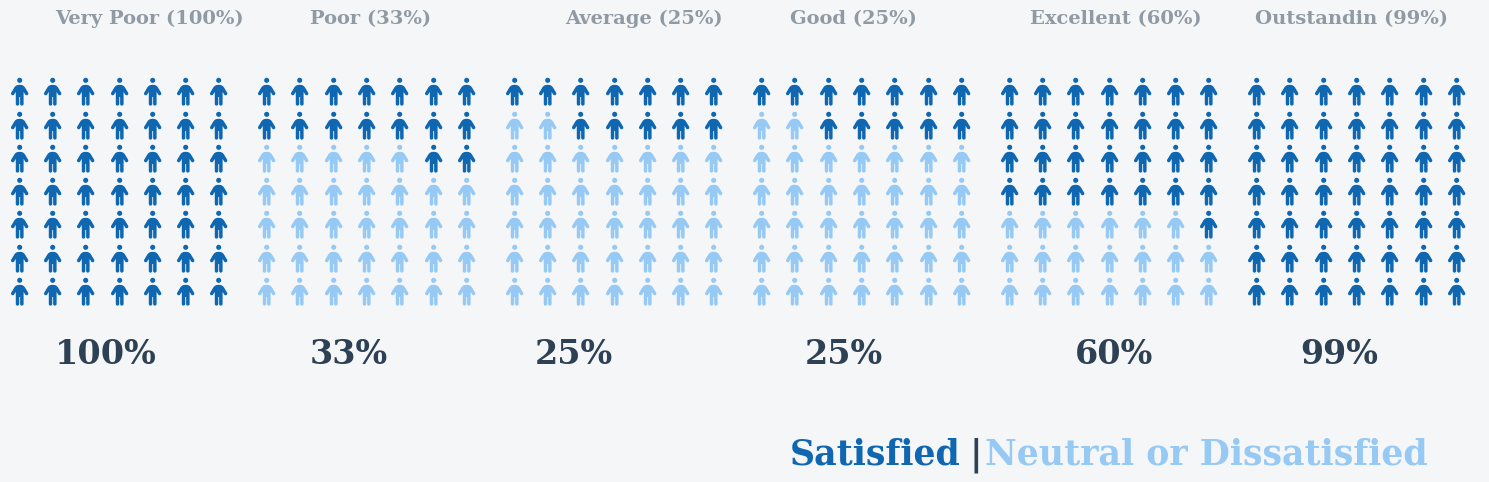

In [24]:
Online_boarding = df_ord['Inflight wifi service'].value_counts().sort_index()
dissatisfied_ob = df_ord[df_ord['satisfaction'] == 'neutral or dissatisfied']['Inflight wifi service'].value_counts().sort_index()
satisfied_ob = df_ord[df_ord['satisfaction'] == 'satisfied']['Inflight wifi service'].value_counts().sort_index()

Excellent = Online_boarding.get(1, 0)
Good = Online_boarding.get(2, 0)
Outstanding = Online_boarding.get(3, 0)
average = Online_boarding.get(0, 0)
poor = Online_boarding.get(4, 0)
Very_Poor = Online_boarding.get(5, 0)


satisied_Excellent = int(round(satisfied_ob.get(1, 0) / Excellent * 100, 0))
satisied_good = int(round(satisfied_ob.get(2, 0) / Good * 100, 0))
satisied_Outstanding = int(round(satisfied_ob.get(3, 0) / Outstanding * 100, 0))
satisied_average = int(round(satisfied_ob.get(0, 0) / average * 100, 0))
satisied_poor = int(round(satisfied_ob.get(4, 0) / poor * 100, 0))
satisied_Very_Poor = int(round(satisfied_ob.get(5, 0) / Very_Poor * 100, 0))

dissatisied_Excellent = int(round(dissatisfied_ob.get(1, 0) / Excellent * 100, 0))
dissatisied_good = int(round(dissatisfied_ob.get(2, 0) / Good * 100, 0))
dissatisied_Outstanding = int(round(dissatisfied_ob.get(3, 0) / Outstanding * 100, 0))
dissatisied_average = int(round(dissatisfied_ob.get(0, 0) / average * 100, 0))
dissatisied_poor = int(round(dissatisfied_ob.get(4, 0) / poor * 100, 0))
dissatisied_Very_Poor = int(round(dissatisfied_ob.get(5, 0) / Very_Poor * 100, 0))



fig = plt.figure(FigureClass=Waffle,
                 constrained_layout=True,
                 figsize=(15, 10),
                 facecolor='#F4F6F7',
                 dpi=100,
                 plots={
                     (3, 6, 1): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_Very_Poor, dissatisied_Very_Poor],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 6, 2): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_poor, dissatisied_poor],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 6, 3): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_average, dissatisied_average],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 6, 4): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_good, dissatisied_good],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 6, 5): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_Excellent, dissatisied_Excellent],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 6, 6): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_Outstanding, dissatisied_Outstanding],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     }
                 }
                )



# Satisfaction level percentages
fig.text(0.04, 0.65, '{}%'.format(satisied_Very_Poor), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.21, 0.65, '{}%'.format(satisied_poor), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.36, 0.65, '{}%'.format(satisied_average), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.54, 0.65, '{}%'.format(satisied_good), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.72, 0.65, '{}%'.format(satisied_Excellent), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.87, 0.65, '{}%'.format(satisied_Outstanding), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)



# Satisfaction categories
fig.text(0.04, 0.99, 'Very Poor ({}%)'.format(satisied_Very_Poor),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.21, 0.99, 'Poor ({}%)'.format(satisied_poor),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.38, 0.99, 'Average ({}%)'.format(satisied_average),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.53, 0.99, 'Good ({}%)'.format(satisied_good),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.69, 0.99, 'Excellent ({}%)'.format(satisied_Excellent),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.84, 0.99, 'Outstandin ({}%)'.format(satisied_Outstanding),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)

# Legend
fig.text(0.53, 0.55, 'Satisfied', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': satisfaction_color})
fig.text(0.65, 0.55, '|', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': text_color})
fig.text(0.66, 0.55, 'Neutral or Dissatisfied', {'font': 'Serif', 'weight': 'bold', 'size': 25, 'color': neutral_color})

plt.savefig('plot7.png', dpi=300, bbox_inches='tight')
plt.show()


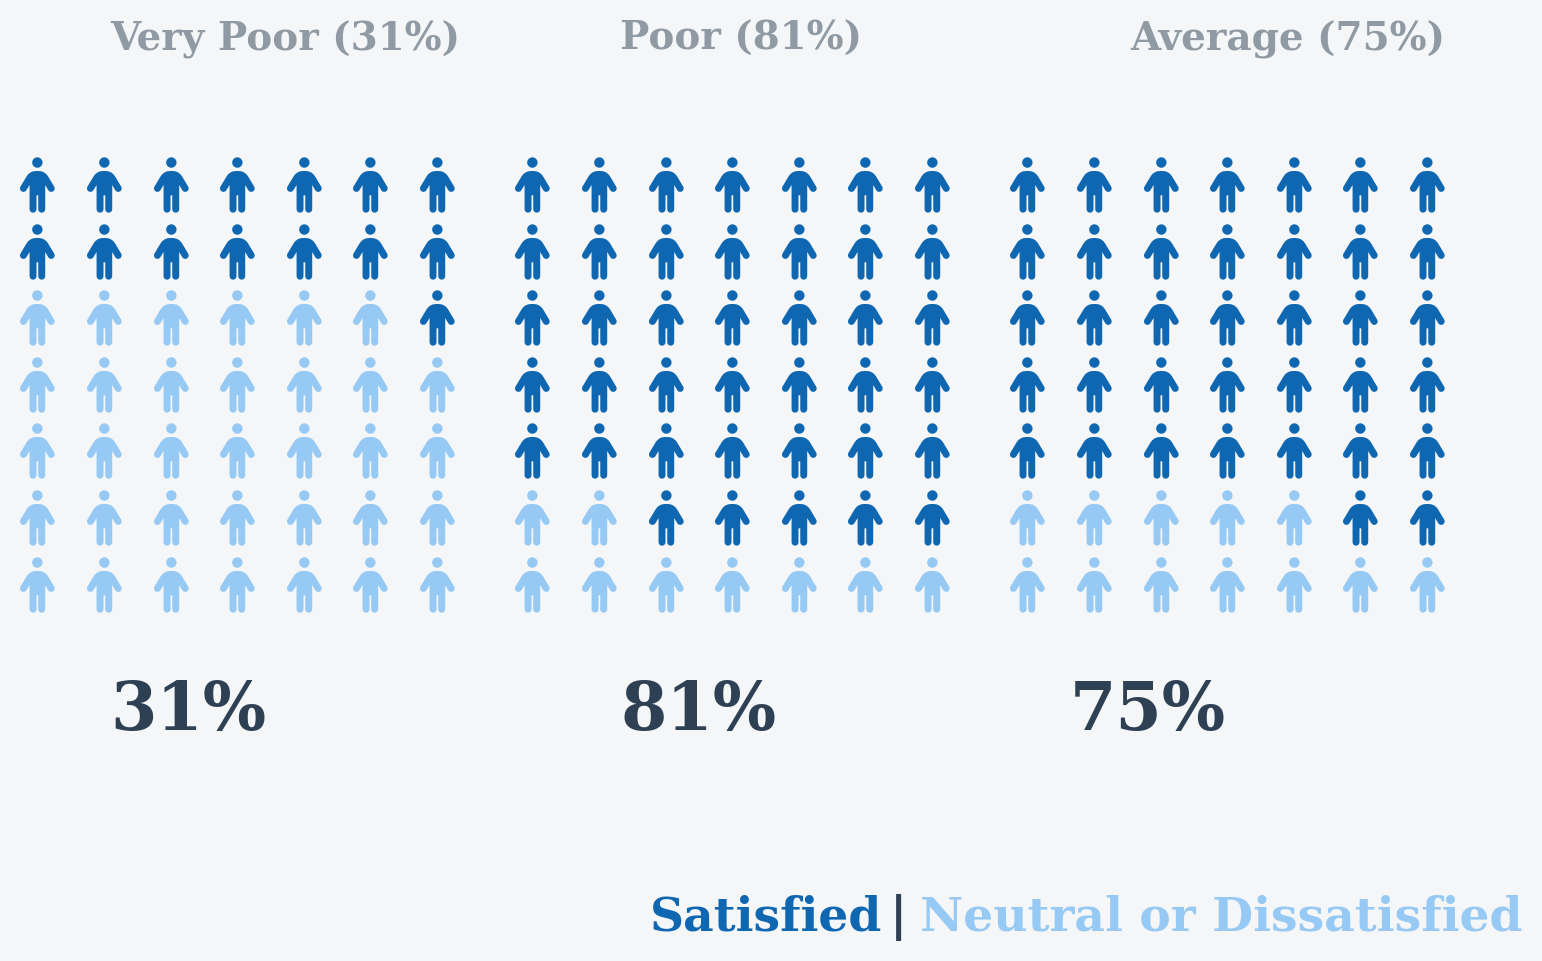

In [25]:
Online_boarding = df_ord['Class'].value_counts().sort_index()
satisfied_ob = df_ord[df_ord['satisfaction'] == 'neutral or dissatisfied']['Class'].value_counts().sort_index()
dissatisfied_ob = df_ord[df_ord['satisfaction'] == 'satisfied']['Class'].value_counts().sort_index()

Excellent = Online_boarding.get(0, 0)
Good = Online_boarding.get(1, 0)
Outstanding = Online_boarding.get(2, 0)



satisied_Excellent = int(round(satisfied_ob.get(0, 0) / Excellent * 100, 0))
satisied_good = int(round(satisfied_ob.get(1, 0) / Good * 100, 0))
satisied_Outstanding = int(round(satisfied_ob.get(2, 0) / Outstanding * 100, 0))

dissatisied_Excellent = int(round(dissatisfied_ob.get(0, 0) / Excellent * 100, 0))
dissatisied_good = int(round(dissatisfied_ob.get(1, 0) / Good * 100, 0))
dissatisied_Outstanding = int(round(dissatisfied_ob.get(2, 0) / Outstanding * 100, 0))




fig = plt.figure(FigureClass=Waffle,
                 constrained_layout=True,
                 figsize=(15, 10),
                 facecolor='#F4F6F7',
                 dpi=200,
                 plots={
                     (3, 6, 1): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_Excellent, dissatisied_Excellent],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 6, 2): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_good, dissatisied_good],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     },
                     (3, 6, 3): {
                         'rows': 7,
                         'columns': 7,
                         'values': [satisied_Outstanding, dissatisied_Outstanding],
                         'colors': [satisfaction_color, neutral_color],
                         'vertical': True,
                         'interval_ratio_x': 0.01,
                         'interval_ratio_y': 0.01,
                         'icons': 'person',
                         'icon_legend': False,
                         'icon_size': 20,
                         'plot_anchor': 'C',
                         'alpha': 0.8,
                         'starting_location': 'NE'
                     }
                 }
                )


# Satisfaction level percentages
fig.text(0.04, 0.65, '{}%'.format(satisied_Excellent), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.21, 0.65, '{}%'.format(satisied_good), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)
fig.text(0.36, 0.65, '{}%'.format(satisied_Outstanding), {'font': 'Serif', 'size': 24, 'weight': 'bold', 'color': text_color}, alpha=1)




# Satisfaction categories
fig.text(0.04, 0.99, 'Very Poor ({}%)'.format(satisied_Excellent),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.21, 0.99, 'Poor ({}%)'.format(satisied_good),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)
fig.text(0.38, 0.99, 'Average ({}%)'.format(satisied_Outstanding),
         {'font': 'Serif', 'size': 14, 'weight': 'bold', 'color': text_color}, alpha=0.5)


# Legend
fig.text(0.22, 0.55, 'Satisfied', {'font': 'Serif', 'weight': 'bold', 'size': 17, 'color': satisfaction_color})
fig.text(0.3, 0.55, '|', {'font': 'Serif', 'weight': 'bold', 'size': 17, 'color': text_color})
fig.text(0.31, 0.55, 'Neutral or Dissatisfied', {'font': 'Serif', 'weight': 'bold', 'size': 17, 'color': neutral_color})

plt.savefig('plot7.png', dpi=300, bbox_inches='tight')
plt.show()


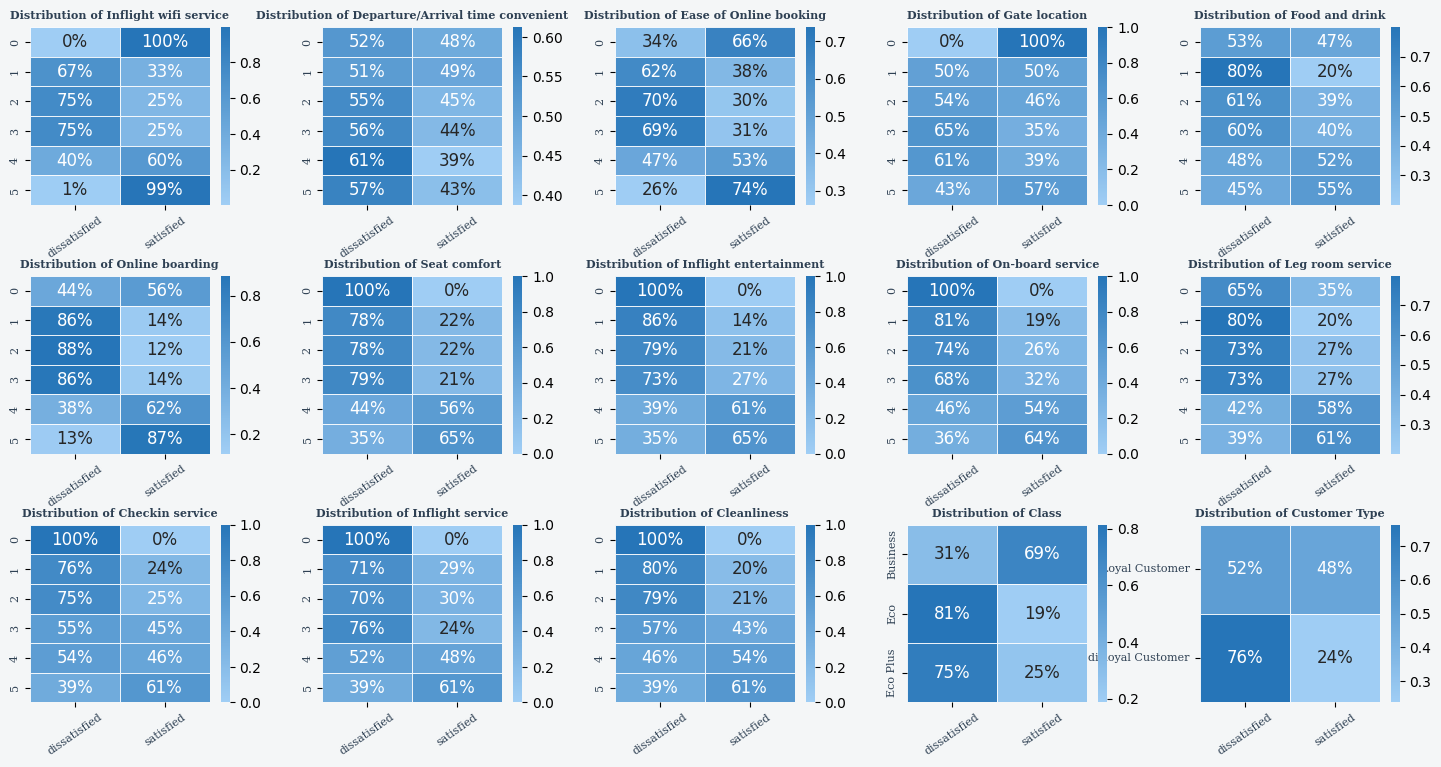

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors

# Define your theme colors
satisfaction_color = '#0F67B1'  # Satisfaction
neutral_color = '#96C9F4'  # Neutral
dissatisfaction_color = '#96C9F4'  # Dissatisfaction
background_color = '#F4F6F7'  # Light Gray (Background)
text_color = '#2E4053'  # Dark Charcoal (Text)
attrition_color = '#FF6F61'  # Corporate Red
retention_color = '#5F6A6A'  # Steel Gray

# Create some sample data (replace this with your actual dataset)
features = ['Inflight wifi service', 'Departure/Arrival time convenient',
            'Ease of Online booking', 'Gate location', 'Food and drink',
            'Online boarding', 'Seat comfort', 'Inflight entertainment',
            'On-board service', 'Leg room service', 'Checkin service',
            'Inflight service', 'Cleanliness', 'Class','Customer Type']

# Create a figure with 2 rows and 3 columns of subplots
fig = plt.figure(figsize=(18, 12), dpi=100)
gs = fig.add_gridspec(4, 5)
gs.update(wspace=0.3, hspace=0.4)

# Initialize subplots
axes = [fig.add_subplot(gs[i, j]) for i in range(3) for j in range(5)]

# Create colormaps
col1 = [dissatisfaction_color, satisfaction_color]
colormap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", col1, N=256)
col2 = [dissatisfaction_color, satisfaction_color]
colormap2 = matplotlib.colors.LinearSegmentedColormap.from_list("", col2, N=256)

# Plot heatmaps
for i, feature in enumerate(features):
    ax = axes[i]
    # Crosstab and heatmap (replace with your actual data)
    crosstab = pd.crosstab(df[feature], df['satisfaction'], normalize='index')
    sns.heatmap(ax=ax, data=crosstab, linewidths=0.5, cmap=colormap1 if i % 2 == 0 else colormap2,
                annot=True, fmt='1.0%', annot_kws={"fontsize":12}, alpha=0.9)

    # Set titles and labels
    ax.set_title(f'Distribution of {feature}', fontdict={'font': 'Serif', 'color': text_color, 'weight': 'bold', 'size': 8})
    ax.set_xlabel('', fontdict={'font': 'Serif', 'color': text_color, 'size': 8})
    ax.set_ylabel('', fontdict={'font': 'Serif', 'color': text_color, 'size': 8})

    # Rotate x-axis tick labels 45 degrees
    ax.set_xticklabels(['dissatisfied', 'satisfied'], fontdict={'font': 'Serif', 'color': text_color, 'size': 8}, rotation=35)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict={'font': 'Serif', 'color': text_color, 'size': 8})

# Adjust figure background and show
fig.patch.set_facecolor(background_color)
for ax in axes:
    ax.set_facecolor(background_color)
plt.savefig('plot9.png', dpi=300, bbox_inches='tight')
plt.show()


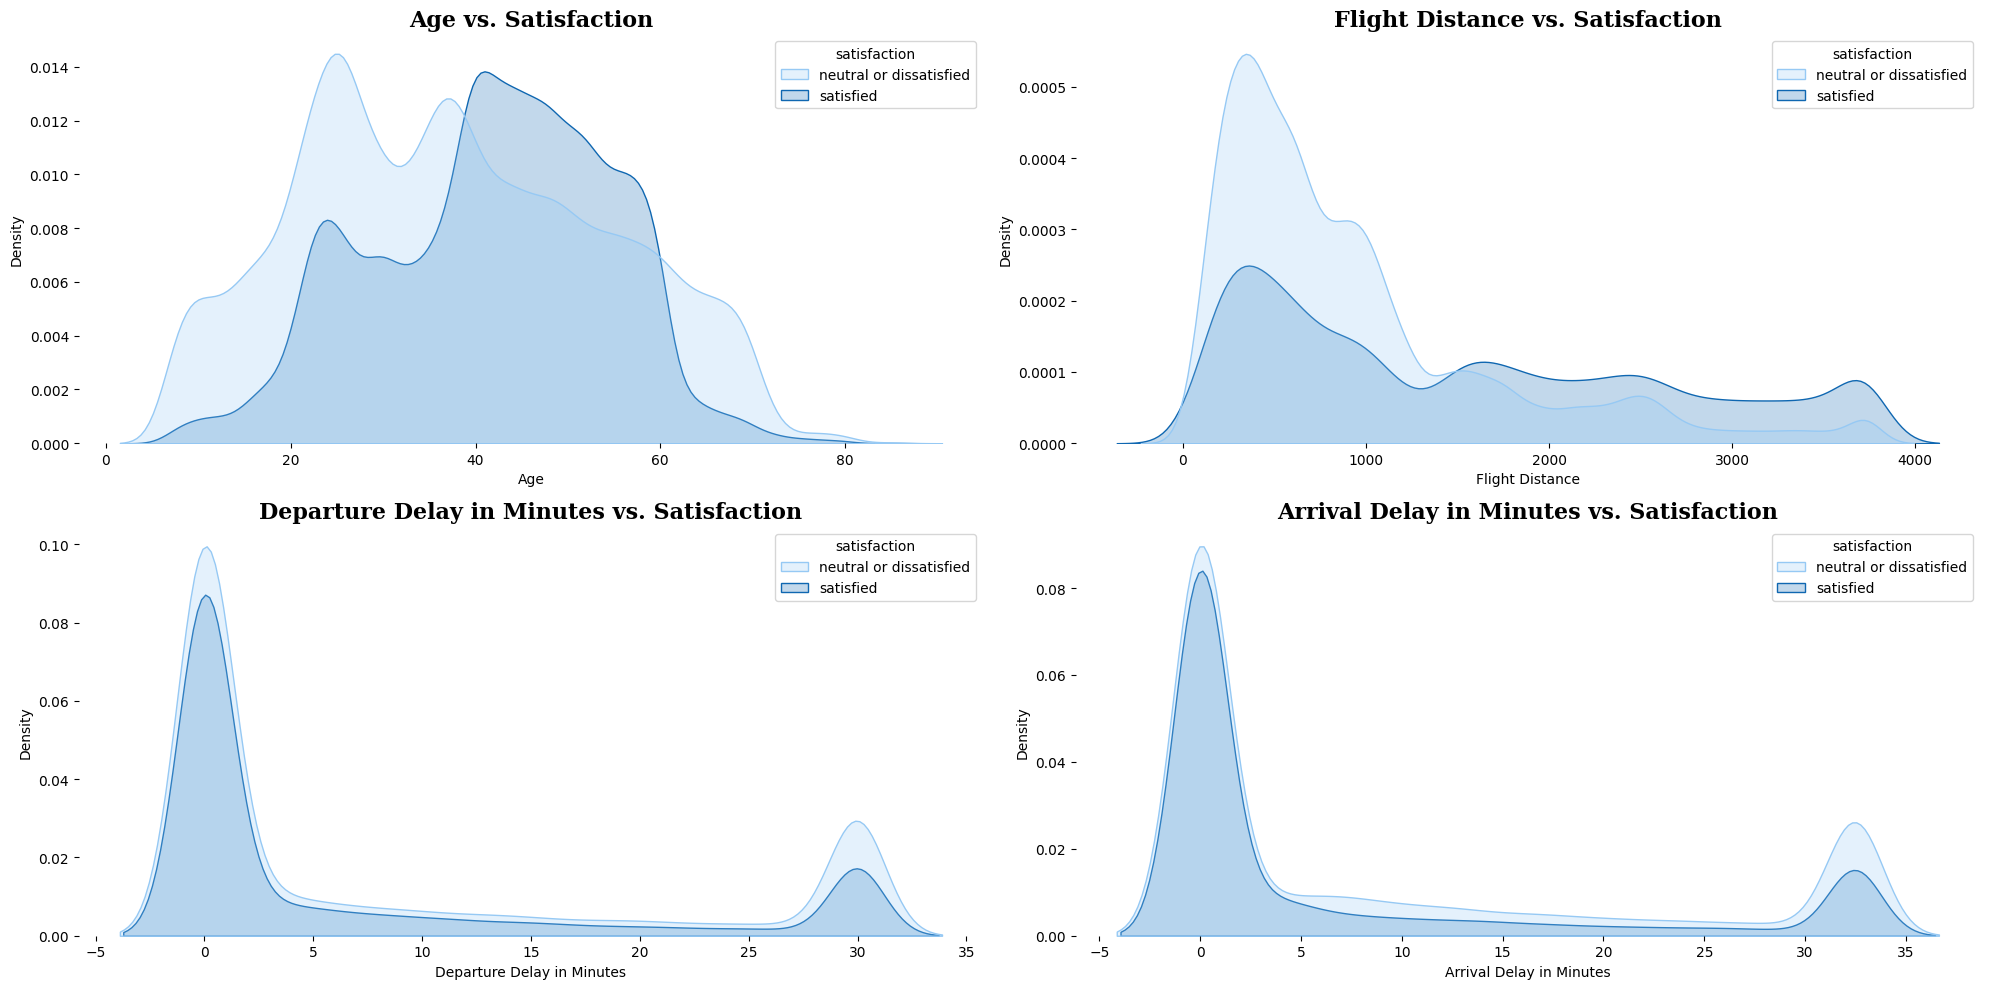

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define colors
satisfaction_color = '#0F67B1'
dissatisfaction_color = '#96C9F4'

# Define text and background colors
text_color = 'black'  # Desired text color
background_color = 'white'  # Desired background color

# Define the color palette
palette = {
    'satisfied': satisfaction_color,
    'neutral or dissatisfied': dissatisfaction_color
}

num_columns = df_ord.select_dtypes(include=['number']).columns
num_cols = len(num_columns)
cols = 2
rows = (num_cols // cols) + (num_cols % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.kdeplot(ax=axes[i], x=col, hue='satisfaction', data=df_ord, fill=True, palette=palette)
    axes[i].set_title(f'{col} vs. Satisfaction', fontdict={'font': 'Serif', 'color': text_color, 'size': 16, 'weight': 'bold'})
    axes[i].set_facecolor(background_color)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].tick_params(axis='x', colors=text_color)  # Set x-axis tick color
    axes[i].tick_params(axis='y', colors=text_color)  # Set y-axis tick color
    axes[i].xaxis.label.set_color(text_color)  # Set x-axis label color
    axes[i].yaxis.label.set_color(text_color)  # Set y-axis label color

# Turn off unused subplots
for j in range(len(num_columns), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
fig.patch.set_facecolor(background_color)
plt.savefig('plot1.png', dpi=300, bbox_inches='tight')
plt.show()


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

satisfaction_color = '#0F67B1'
dissatisfaction_color = '#96C9F4'  # Dissatisfaction

def visualize_column_satisfaction(df, column, color_palette=['#96C9F4', '#0F67B1', '#0D4A8B']):
    plt.rcParams.update({
        'axes.facecolor': '#F4F6F7',  # Light background for the plot area
        'figure.facecolor': '#F4F6F7',  # Light background for the entire figure
        'grid.color': '#444444',  # Subtle grid line color
        'grid.linestyle': '-',  # Solid grid line style
        'text.color': 'black',  # Black text color
        'axes.labelcolor': 'black',  # Black axis label color
        'xtick.color': 'black',  # Black x-axis tick color
        'ytick.color': 'black'  # Black y-axis tick color
    })

    plt.figure(figsize=(18, 6))  # Adjusted size to accommodate subplots

    # Subplot 1: Column count
    plt.subplot(1, 3, 1)
    ax1 = sns.countplot(x=df[column], palette=color_palette, data=df)
    plt.title(f'{column.capitalize()} Count', color='black')
    ax1.spines['top'].set_visible(True)
    ax1.spines['right'].set_visible(True)
    ax1.spines['left'].set_visible(True)
    ax1.spines['bottom'].set_visible(True)
    ax1.spines['top'].set_color('black')
    ax1.spines['right'].set_color('black')
    ax1.spines['left'].set_color('black')
    ax1.spines['bottom'].set_color('black')

    # Subplot 2: Count by Satisfaction
    plt.subplot(1, 3, 2)
    ax2 = sns.countplot(x=df[column], hue='satisfaction', palette=color_palette, data=df)
    plt.title(f'{column.capitalize()} Count by Satisfaction', color='black')
    ax2.spines['top'].set_visible(True)
    ax2.spines['right'].set_visible(True)
    ax2.spines['left'].set_visible(True)
    ax2.spines['bottom'].set_visible(True)
    ax2.spines['top'].set_color('black')
    ax2.spines['right'].set_color('black')
    ax2.spines['left'].set_color('black')
    ax2.spines['bottom'].set_color('black')
    ax2.legend(loc='upper right', bbox_to_anchor=(1.2, 1.25))

    # Subplot 3: Distribution
    plt.subplot(1, 3, 3)
    ax3 = df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=color_palette, wedgeprops=dict(edgecolor='none'))
    plt.title(f'{column.capitalize()} Distribution', color='black')
    ax3.spines['top'].set_visible(True)
    ax3.spines['right'].set_visible(True)
    ax3.spines['left'].set_visible(True)
    ax3.spines['bottom'].set_visible(True)
    ax3.spines['top'].set_color('black')
    ax3.spines['right'].set_color('black')
    ax3.spines['left'].set_color('black')
    ax3.spines['bottom'].set_color('black')
    ax3.legend(loc='upper right', bbox_to_anchor=(1, 1.25))

    plt.tight_layout()
    plt.show()


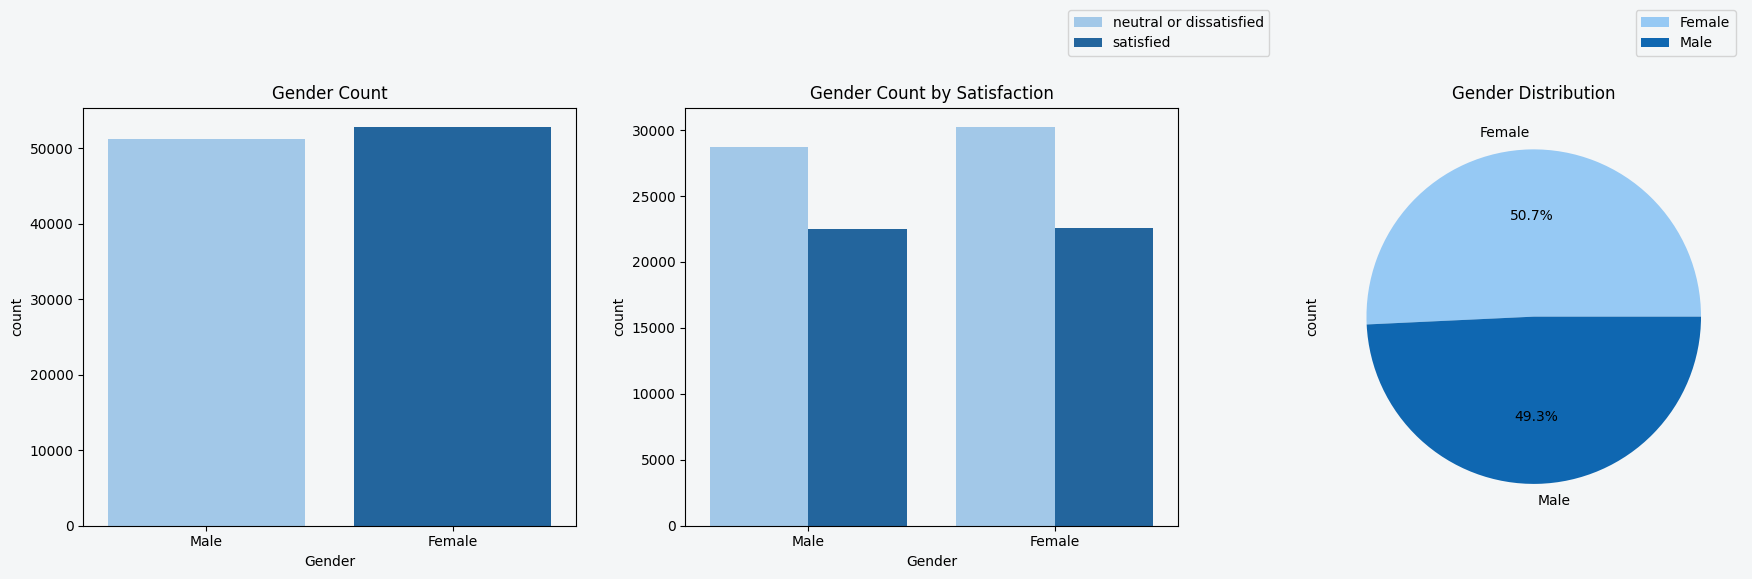

In [29]:
visualize_column_satisfaction(df, 'Gender')


- number of males and females almost the same there is a little difference
-  Satisfaction still the same

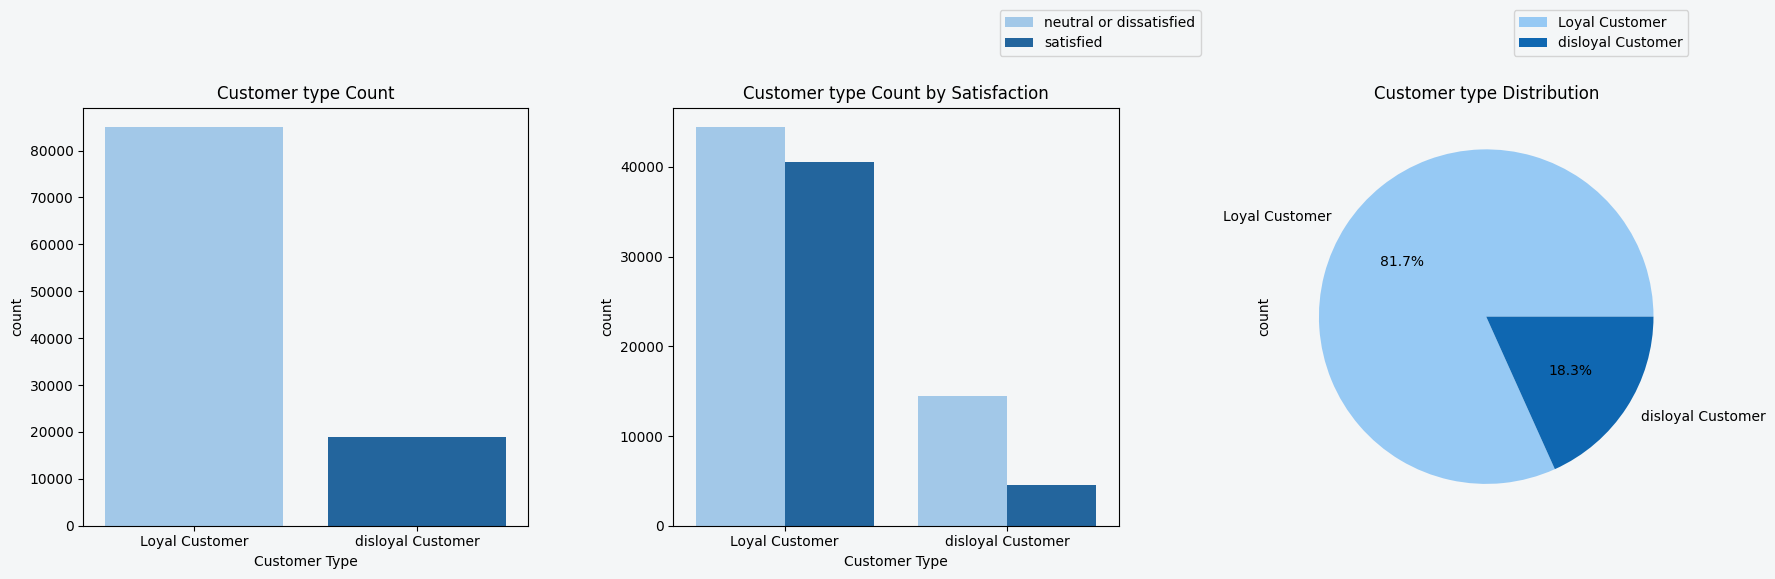

In [30]:
visualize_column_satisfaction(df, 'Customer Type')


<p style="font-family: 'Georgia', serif; font-size: 16px; color: #333; padding: 10px; border-left: 5px solid #0B3D91; border-radius: 8px;">
 <strong>(Customer Type)</strong>
</p>

- the number of (loyal customer )is more than the number of (first_time or disloyal)customers
- most of the loyal customers are not satisfied  

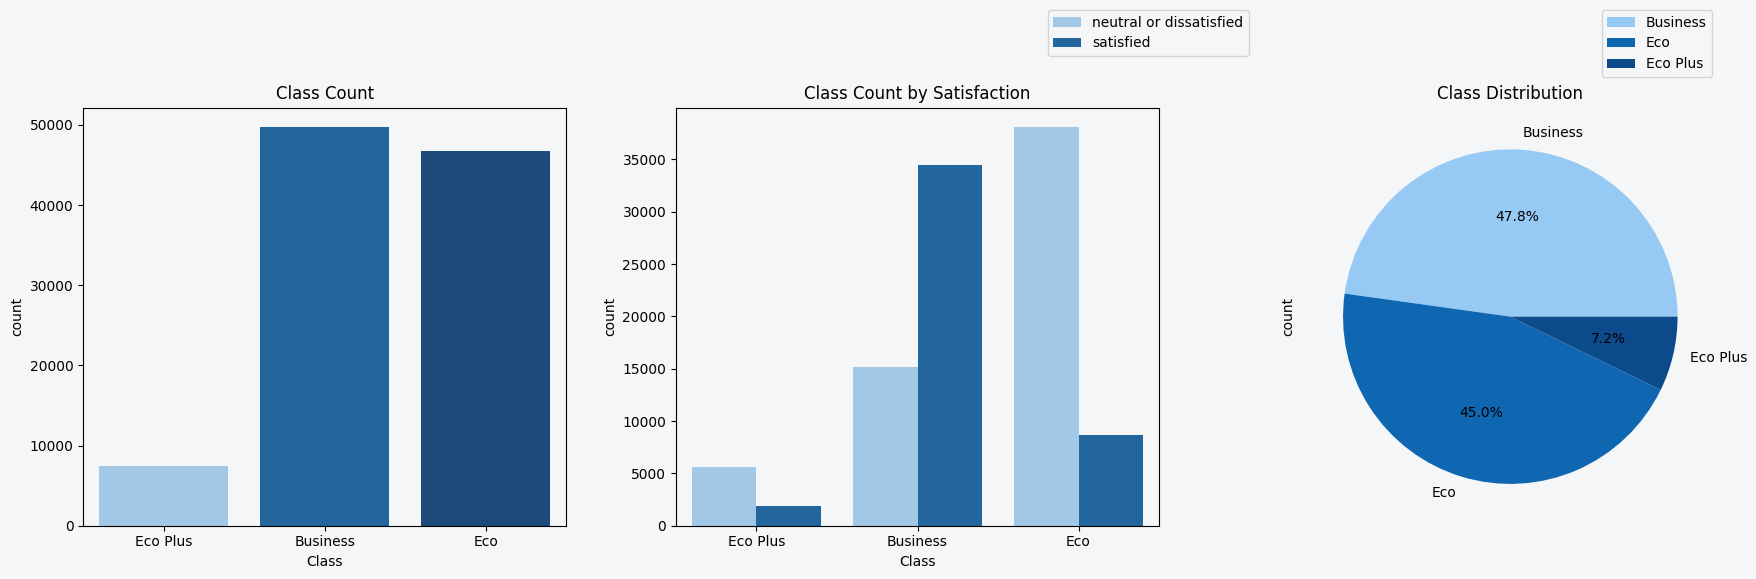

In [31]:
visualize_column_satisfaction(df, 'Class')

<p style="font-family: 'Georgia', serif; font-size: 16px; color: #333; padding: 10px; border-left: 5px solid #0B3D91; border-radius: 8px;">
 <strong>(Class)</strong>
</p>

- number of passengers in the Business and Economy  classes is close to each other
- the number of passengers in the Economy Plus class is small
- many passengers in Business class are satisfied
- in economy and economy plus  are neutral or dissatisfied.

<p style="font-family: 'Georgia', serif; font-size: 16px; color: #333; padding: 10px; border-left: 5px solid #0B3D91; border-radius: 8px;">
 <strong>(Potential Improvements)</strong>
</p>

- Conduct surveys or analyze feedback to understand what is causing dissatisfaction in Economy and Economy Plus classes.
  - Common issues could include seating comfort, service quality, or in-flight amenities.

<p style="font-family: 'Georgia', serif; font-size: 16px; color: #333; padding: 10px; border-left: 5px solid #0B3D91; border-radius: 8px;">
 <strong>(Promotions Ideas)</strong>
</p>

- Make Economy Plus More Attractive:
- Offer Deals: Provide discounts or special offers to encourage more people to choose Economy Plus.
- Show Off Benefits
- Highlight Features: Keep showcasing the great things about Business class, like comfortable seats and top-notch service, to attract more people.

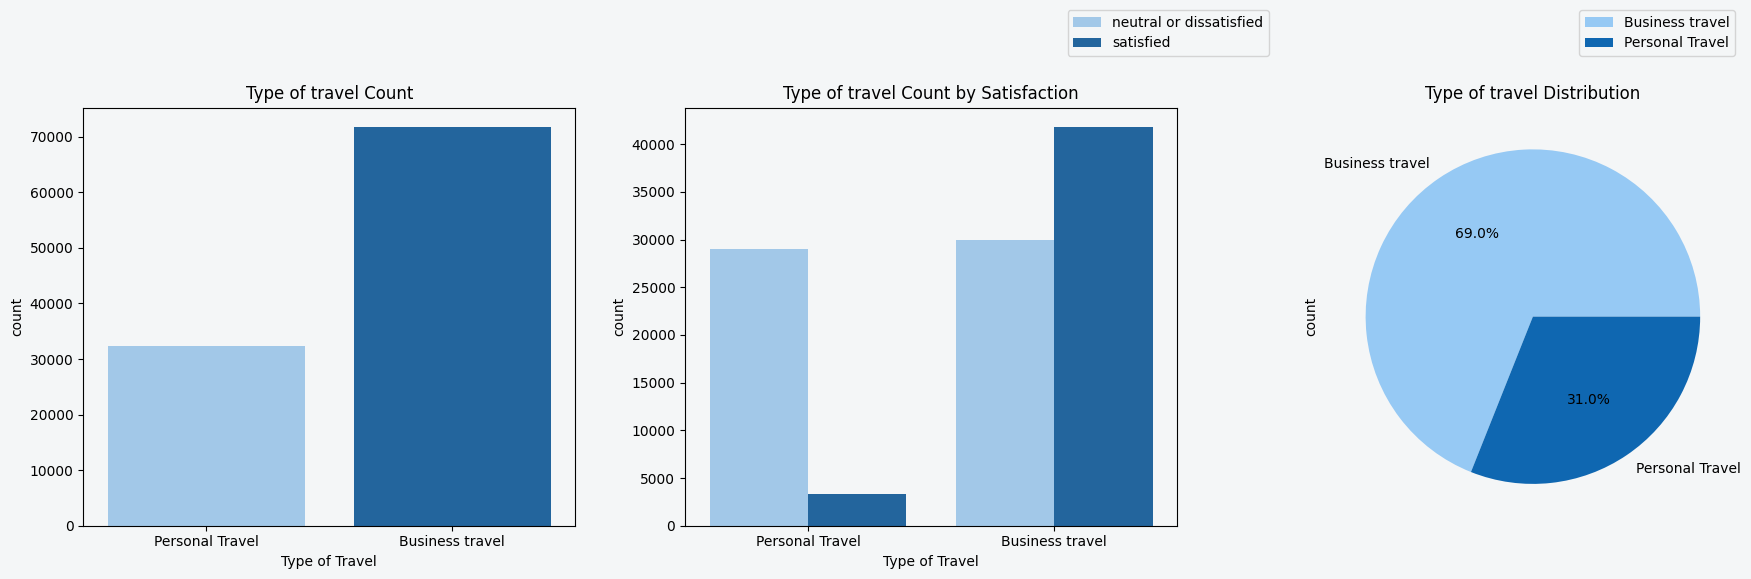

In [32]:
visualize_column_satisfaction(df, 'Type of Travel')

<p style="font-family: 'Georgia', serif; font-size: 16px; color: #333; padding: 10px; border-left: 5px solid #0B3D91; border-radius: 8px;">
 <strong>(Type of Travel)</strong>
</p>

- the number of Business travels is more than Personnel travels.
- satisfied passengers in Business travel more than the number of satisfied passengers in Personal travel
- many passenger in personal travel are neutral or dissatisfied

<p style="font-family: 'Georgia', serif; font-size: 16px; color: #333; padding: 10px; border-left: 5px solid #0B3D91; border-radius: 8px;">
 <strong>(Improvement Strategies)</strong>
</p>

- we should Enhance Personal Travel Experience: Investigate reasons for dissatisfaction among personal
- Use what works for business travelers to enhance personal travel.
- Regularly gather feedback and make necessary adjustments.

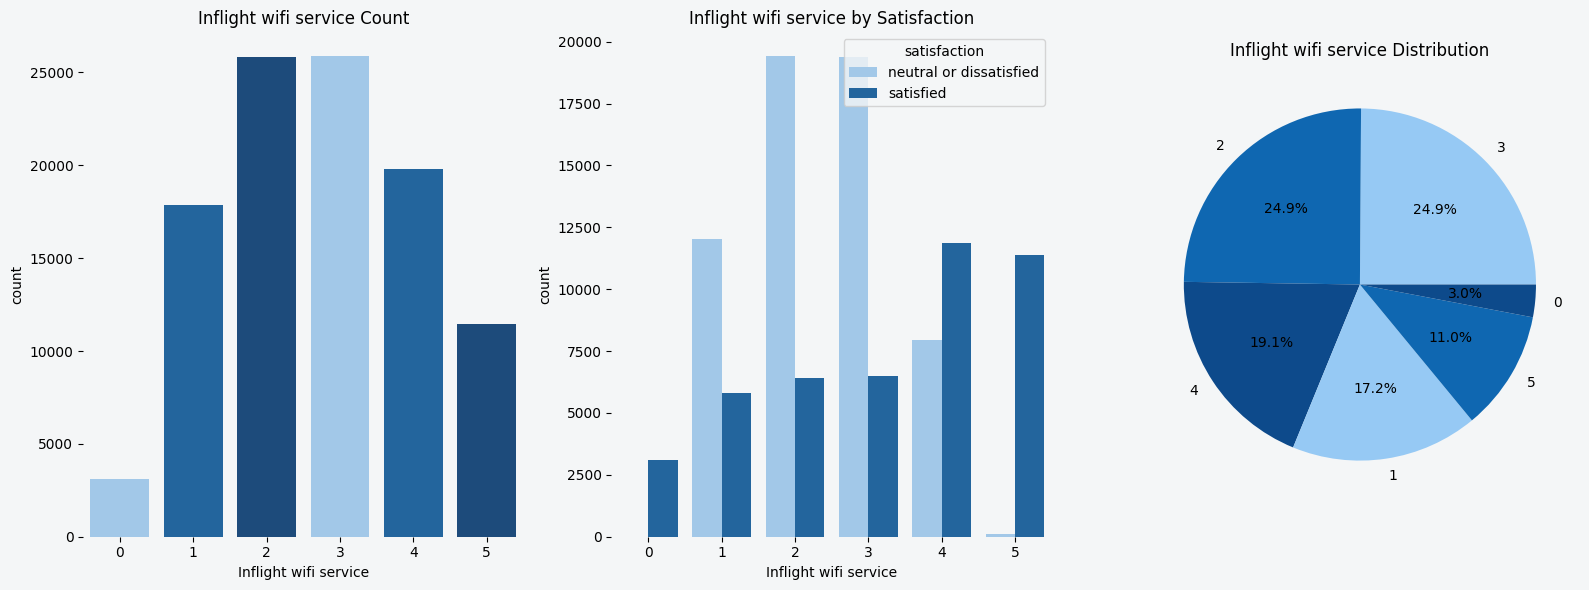

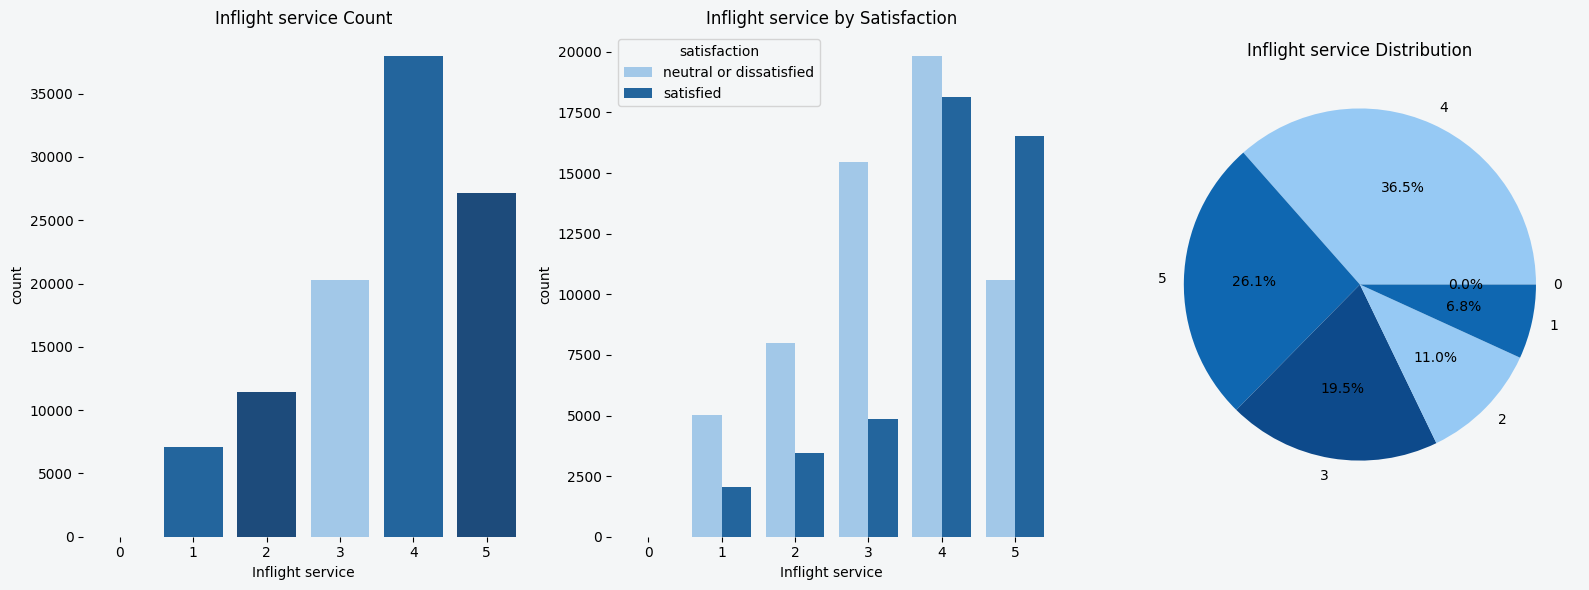

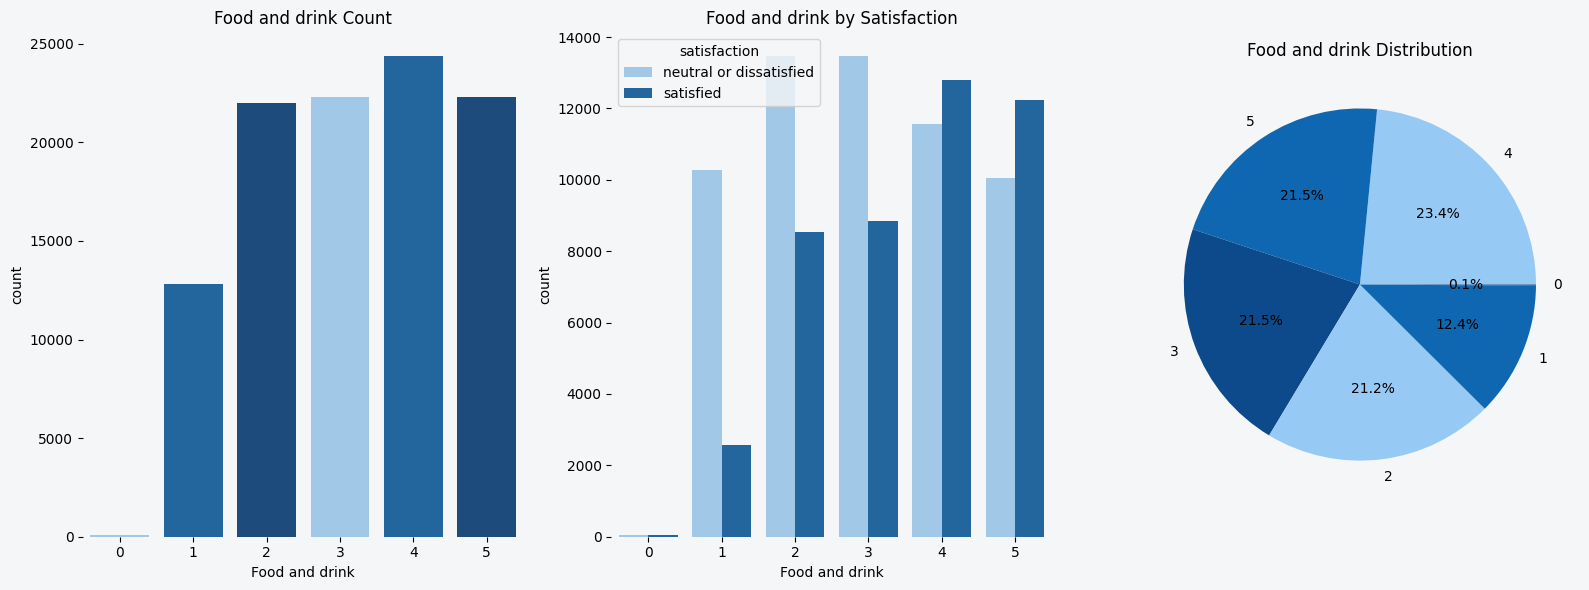

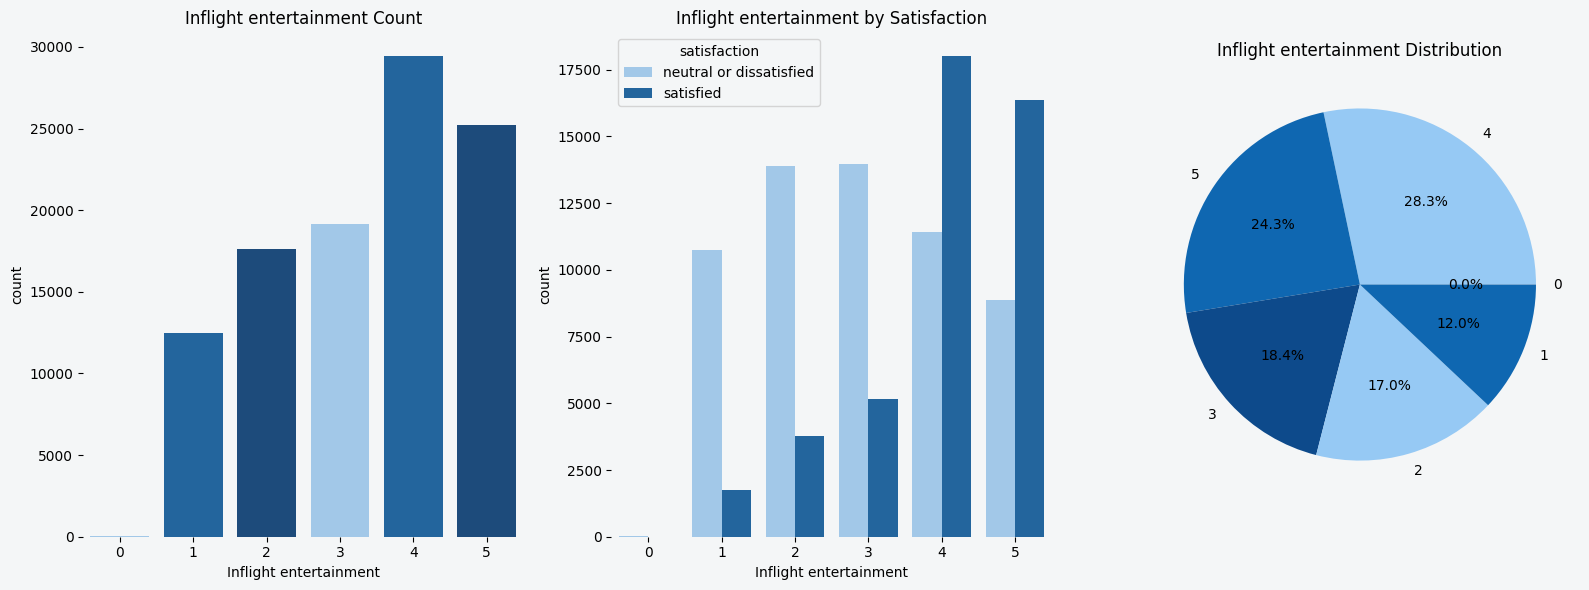

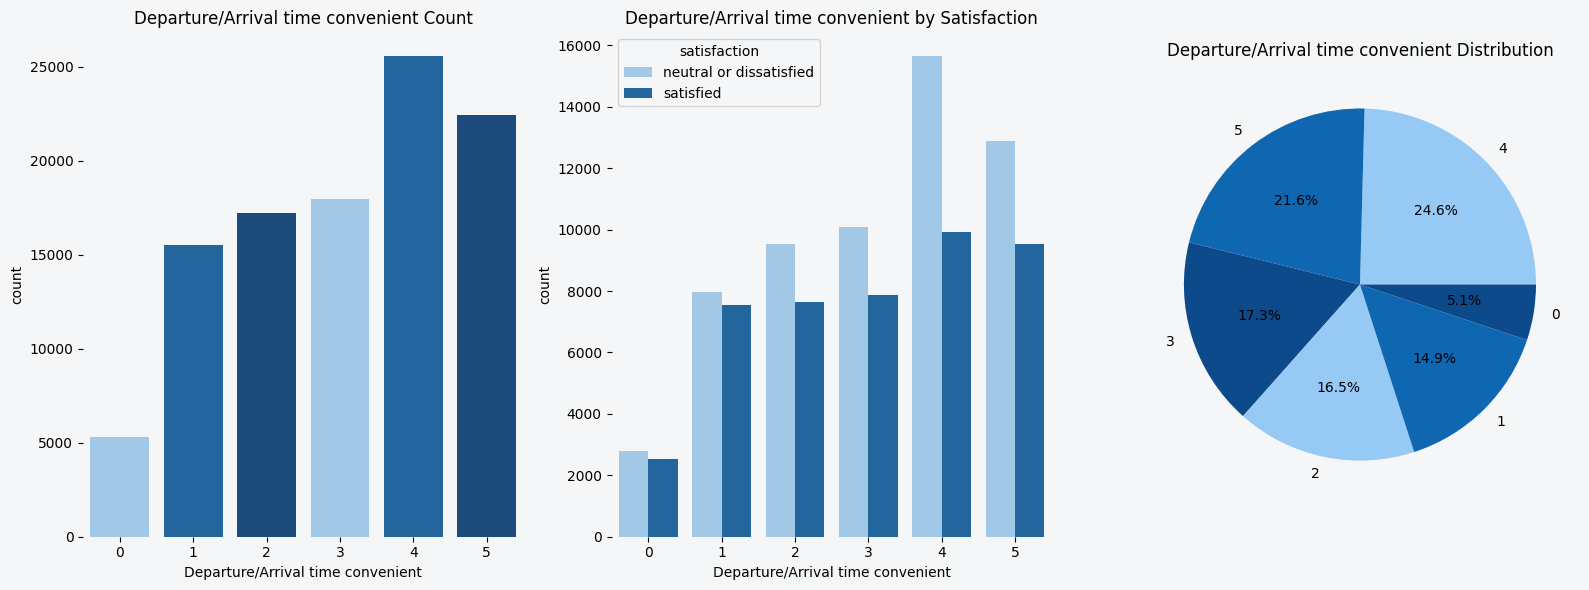

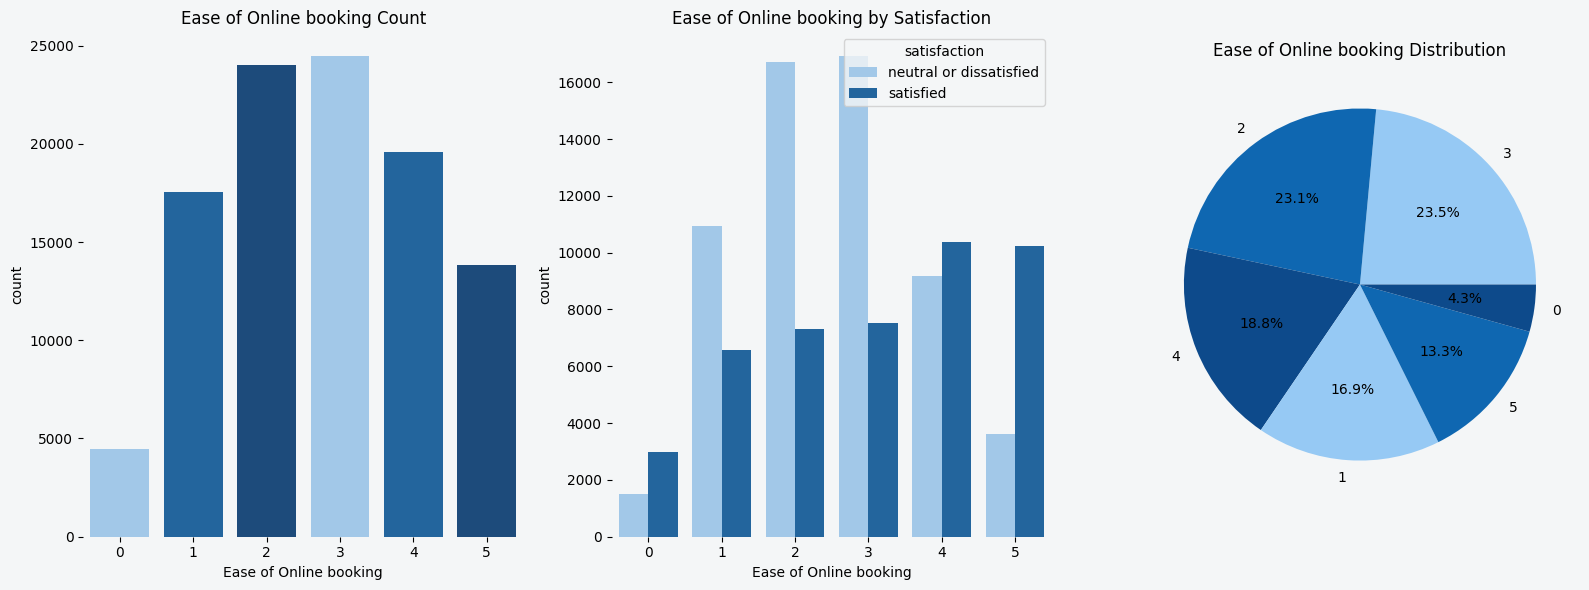

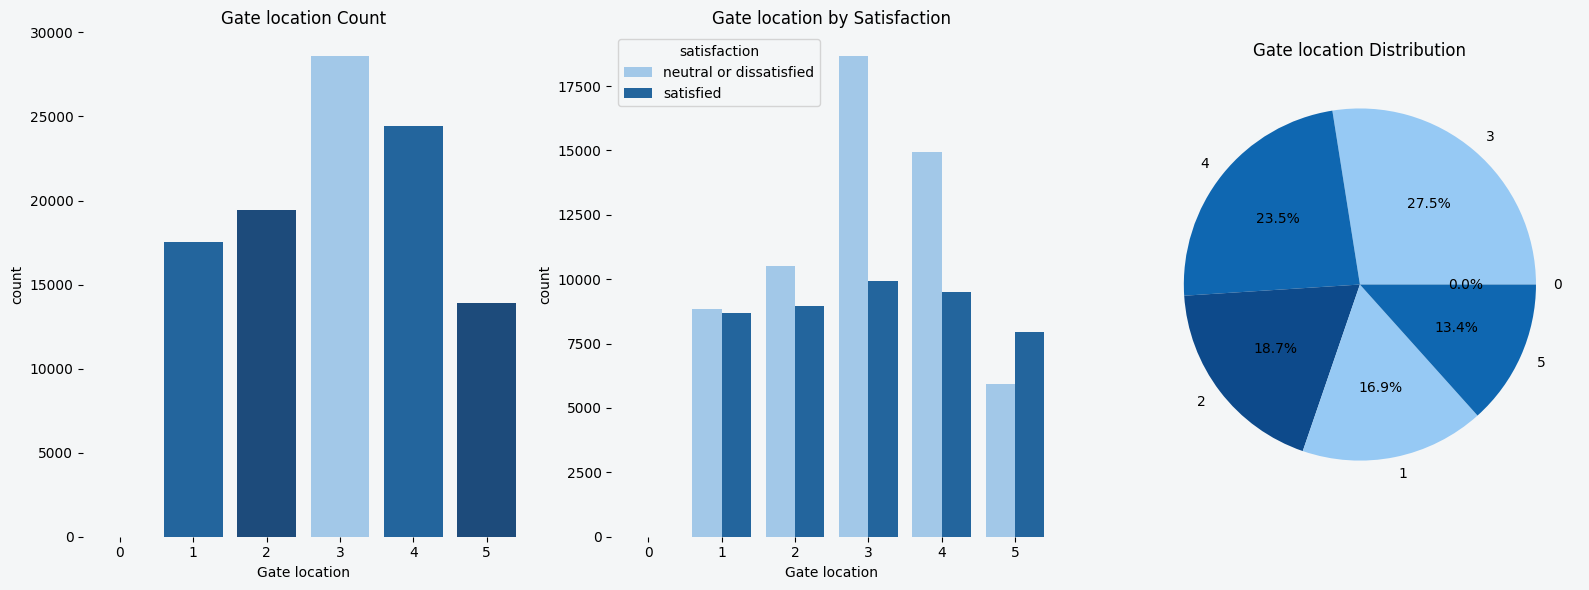

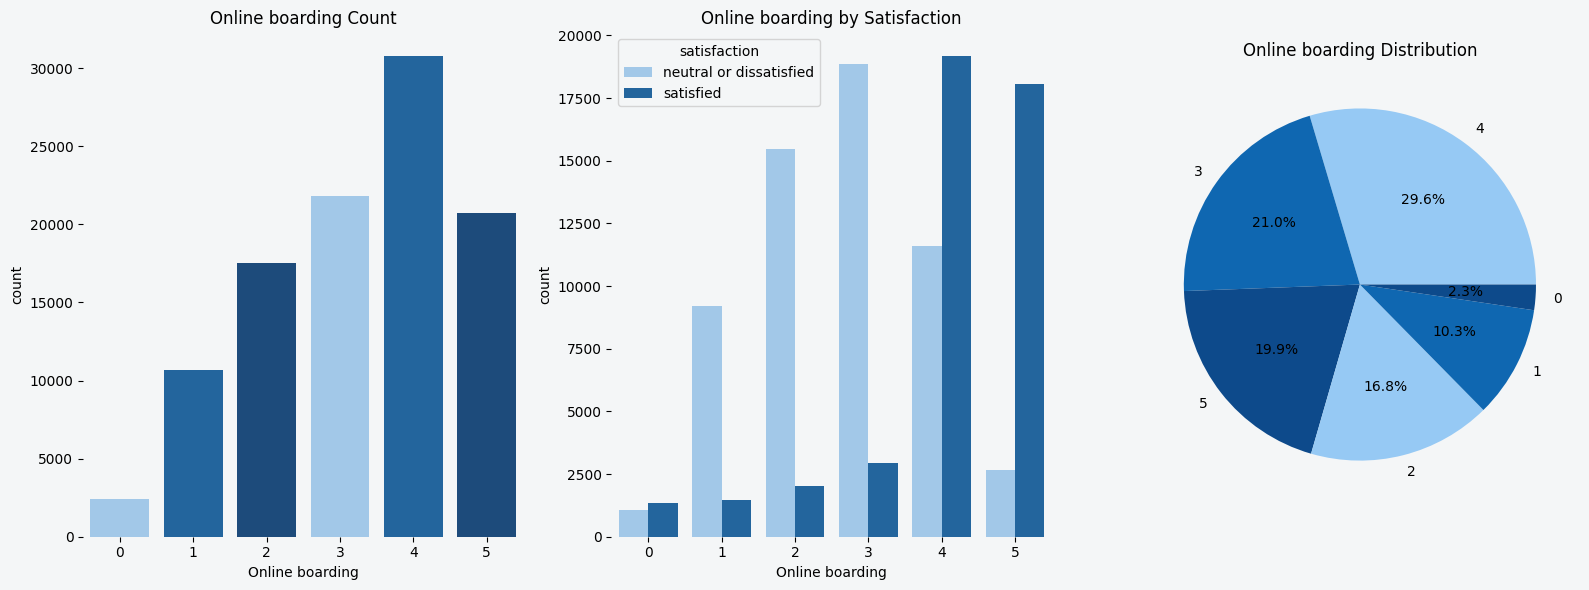

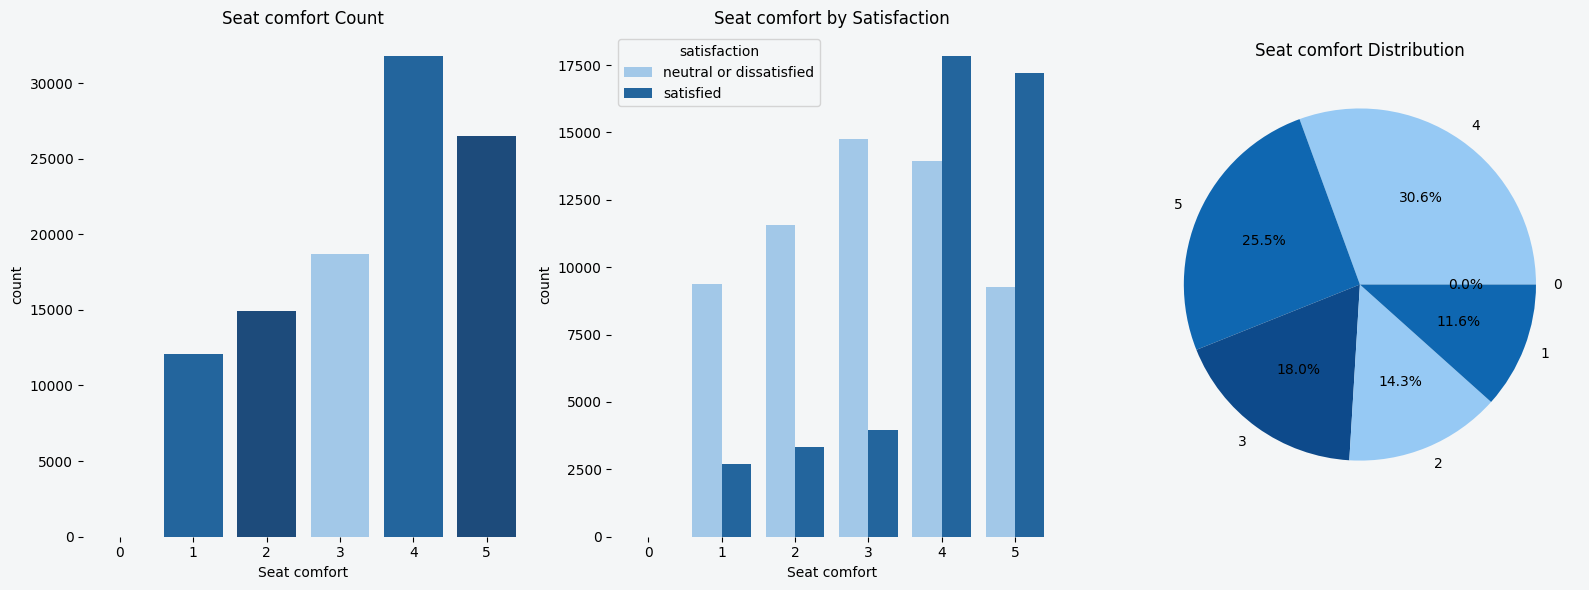

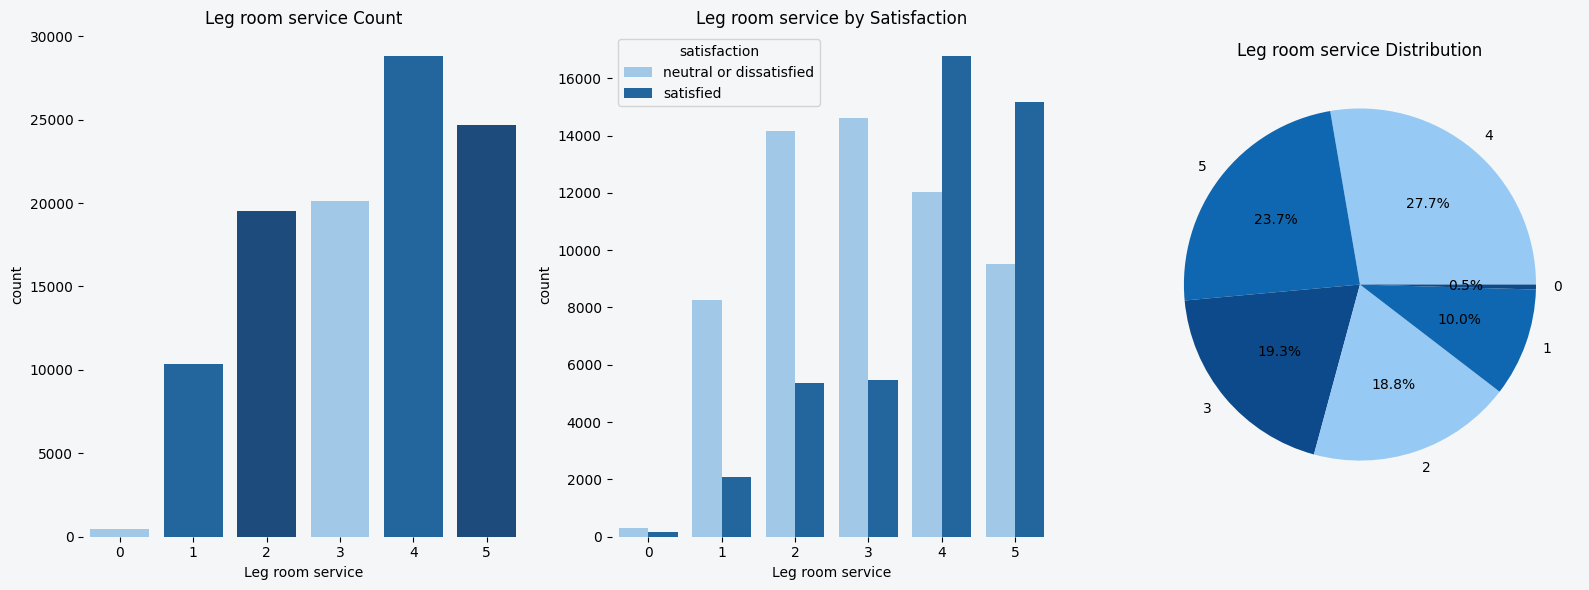

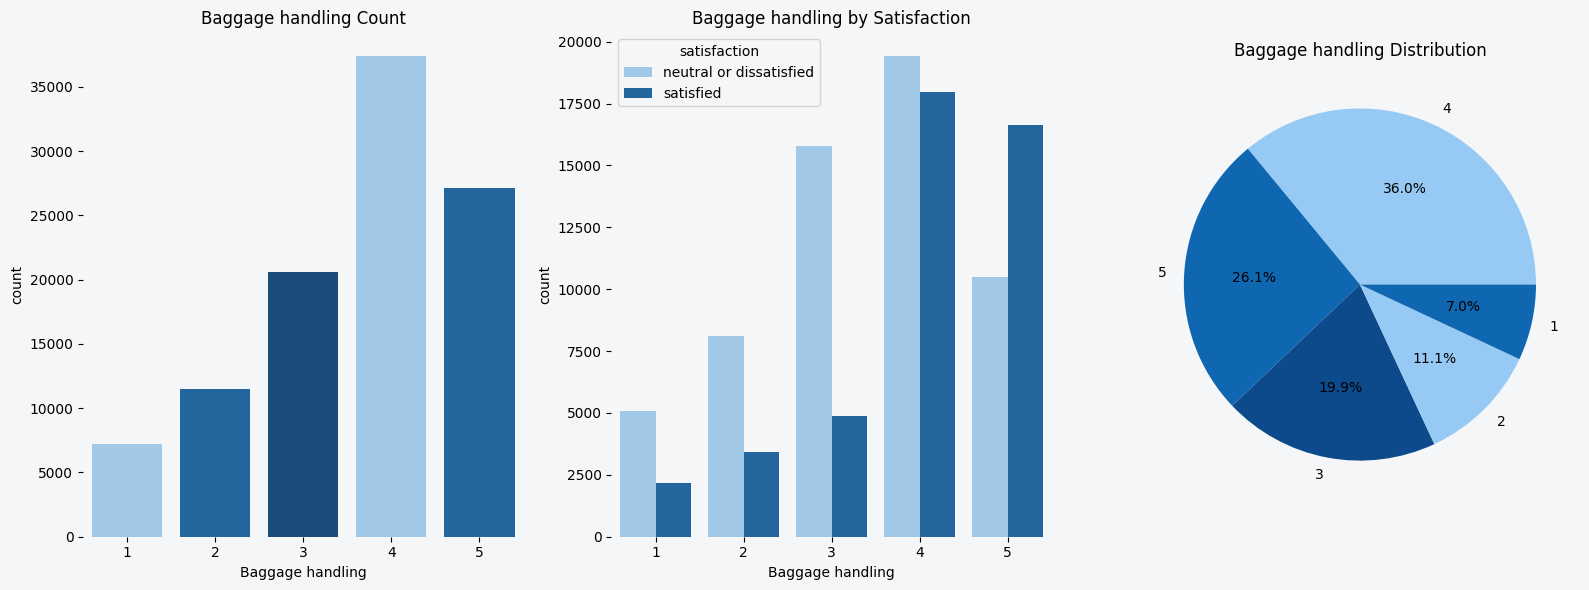

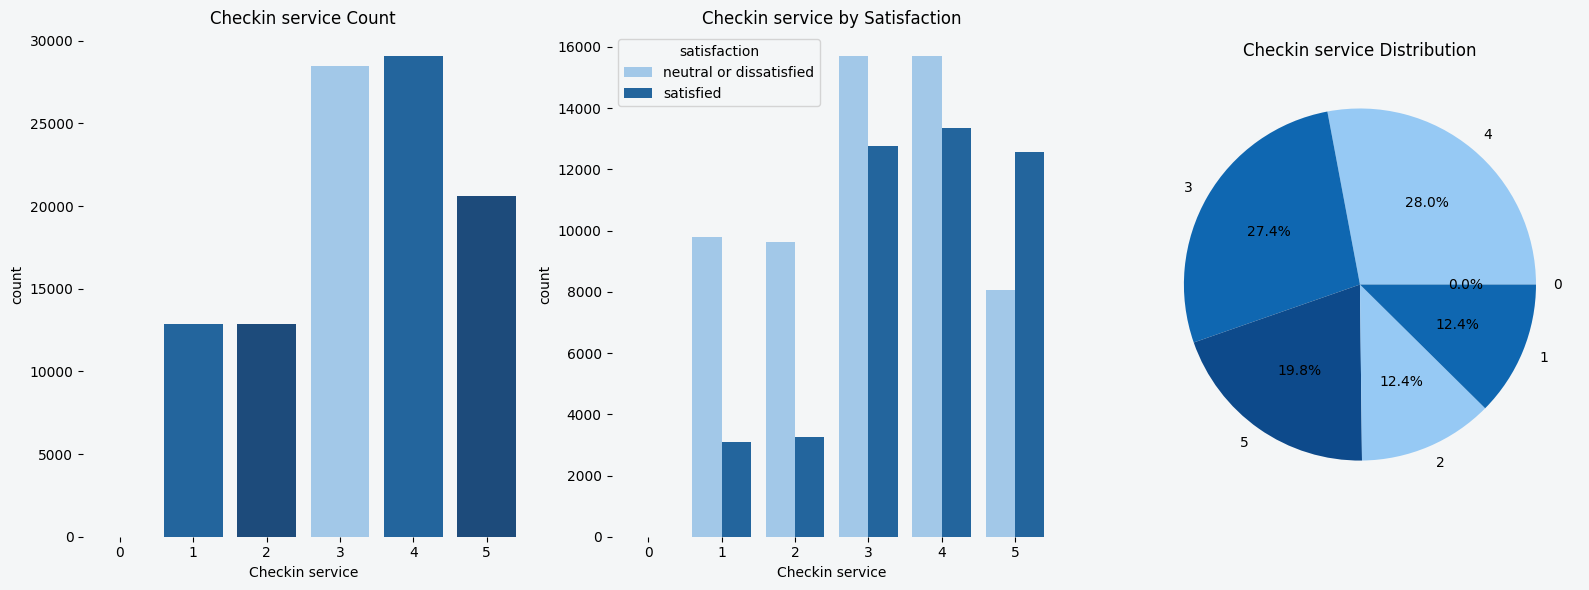

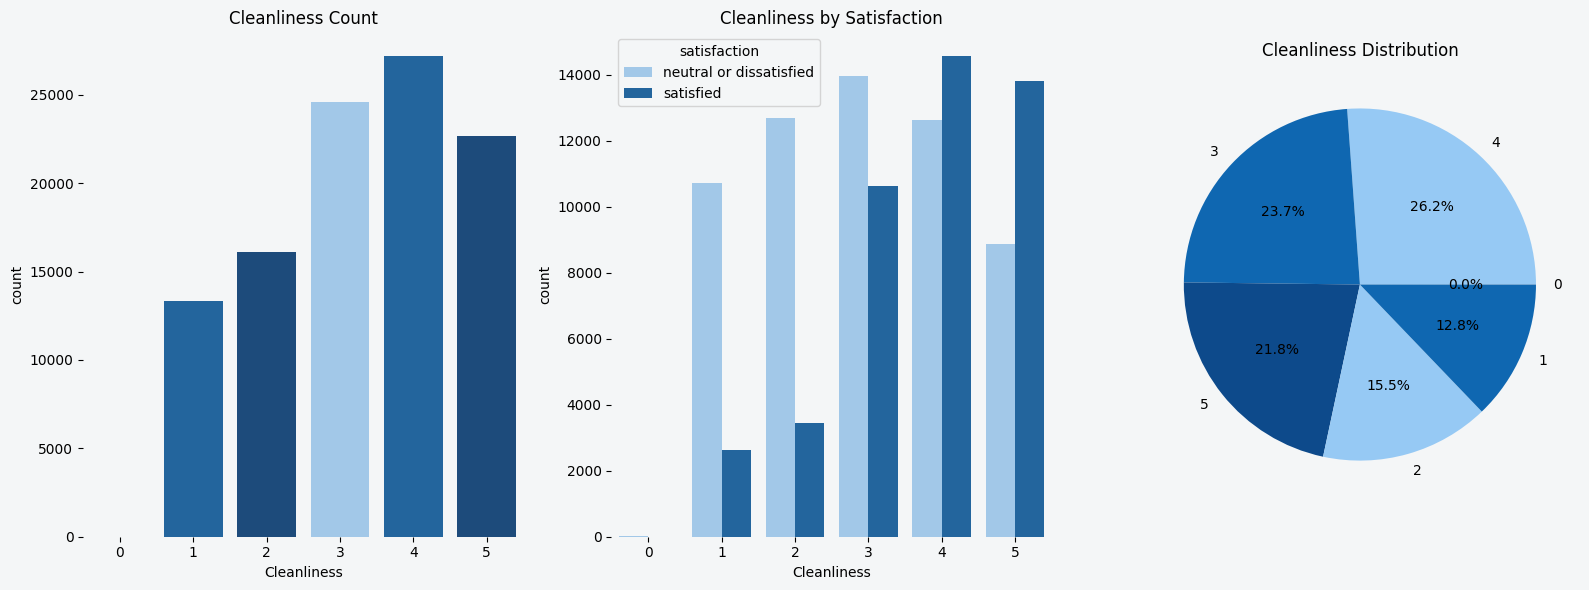

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Updated custom color palette
color_palette = ['#96C9F4', '#0F67B1', '#0D4A8B']
# Dodger Blue, Hot Pink, Blue Violet

services = ['Inflight wifi service', 'Inflight service', 'Food and drink', 'Inflight entertainment',
            'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location',
            'Online boarding', 'Seat comfort', 'Leg room service', 'Baggage handling',
            'Checkin service', 'Cleanliness']

for i in services:
    plt.figure(figsize=(16, 6))

    # Subplot 1: Count plot with custom color palette (black axis ticks and labels)
    plt.subplot(1, 3, 1)
    ax = sns.countplot(x=df[i], palette=color_palette)
    ax.tick_params(colors='black')  # Set tick color to black
    ax.xaxis.label.set_color('black')  # Set x-axis label color to black
    ax.yaxis.label.set_color('black')  # Set y-axis label color to black
    for side in ['right', 'top', 'left', 'bottom']:
        ax.spines[side].set_visible(False)
    plt.title(f'{i} Count', color='black')  # Set title color to black

    # Subplot 2: Count plot by satisfaction (black axis ticks and labels)
    plt.subplot(1, 3, 2)
    ax = sns.countplot(x=df[i], hue=df.satisfaction, palette=color_palette)
    ax.tick_params(colors='black')  # Set tick color to black
    ax.xaxis.label.set_color('black')  # Set x-axis label color to black
    ax.yaxis.label.set_color('black')  # Set y-axis label color to black
    for side in ['right', 'top', 'left', 'bottom']:
        ax.spines[side].set_visible(False)
    plt.title(f'{i} by Satisfaction', color='black')  # Set title color to black

    # Subplot 3: Pie chart with custom color palette (black axis ticks and labels)
    plt.subplot(1, 3, 3)
    df[i].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=color_palette)
    plt.ylabel('')
    ax = plt.gca()  # Get current axis
    for side in ['right', 'top', 'left', 'bottom']:
        ax.spines[side].set_visible(False)
    plt.title(f'{i} Distribution', color='black')  # Set title color to black

    plt.tight_layout()
    plt.show()


<a id="satisfaction-improvements"></a>
<h2 style="text-align: center; font-family: 'Georgia', serif; font-weight: bold; color: #0B3D91; background-color: #E3F2FD; padding: 15px; border-radius: 8px;">
  🌟 Satisfaction Levels & Simple Improvements
</h2>

<ul style="font-family: 'Georgia', serif; font-size: 16px; color: #333; background-color: #F0F8FF; padding: 15px; border-radius: 8px; list-style-type: none; border: 1px solid #0B3D91;">
  <li><strong>Satisfaction Levels (4-5) is low:</strong>
    <ul style="padding-left: 20px;">
      <li>In-Flight Service</li>
      <li>In-Flight Entertainment</li>
      <li>Departure Arrival Time</li>
      <li>Seat Comfort</li>
      <li>Baggage Handling</li>
      <li>Check-in Service</li>
      <li>Cleanliness</li>
    </ul>
  </li>
  <li><strong>Simple Improvements:</strong>
    <ul style="padding-left: 20px;">
      <li><strong>In-Flight Service:</strong> Train staff better and make sure they’re more attentive.</li>
      <li><strong>In-Flight Entertainment:</strong> Update movies and games; fix screens.</li>
      <li><strong>Departure/Arrival Times:</strong> Work on reducing delays and keep passengers informed.</li>
      <li><strong>Seat Comfort:</strong> Make seats more comfortable and adjustable.</li>
      <li><strong>Baggage Handling:</strong> Improve baggage handling to avoid delays and mishandling.</li>
      <li><strong>Check-In Service:</strong> Speed up check-in and ensure staff are helpful.</li>
      <li><strong>Cleanliness:</strong> Clean planes and facilities more often and thoroughly.</li>
    </ul>
  </li>
</ul>

<p style="font-family: 'Georgia', serif; font-size: 16px; color: #333; background-color: #F0F8FF; padding: 10px; border-radius: 8px; border: 1px solid #0B3D91;">
  <strong>Note:</strong> Passengers who rated <strong>In-Flight Wifi Service</strong> as <strong>5</strong> or <strong>0</strong> are generally satisfied with their flight. This suggests that Wi-Fi usage might not be a major concern for everyone, possibly due to shorter flight durations. Nonetheless, maintaining good Wi-Fi quality is important as it affects overall satisfaction.
</p>


In [34]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [35]:
import plotly.express as px
fig=px.sunburst(df,path=['satisfaction','Gender','Customer Type','Type of Travel','Class'],
                color='satisfaction',
                color_discrete_map={'satisfied':'#0F67B1','neutral or dissatisfied':'#96C9F4'})


fig.update_layout(title='<b>Distribution of all non-numircal columns according to passenger satisfication <b>',
                 title_font={'size':25},
                 paper_bgcolor='#F4F6F7',
                 plot_bgcolor='#F4F6F7',
                 height=700)

<a id="data-cleaning"></a>
<h2 style="text-align: center; font-family: 'Georgia', serif; font-weight: bold; color: #0B3D91; background-color: #E3F2FD; padding: 15px; border-radius: 8px;">
  🔧 Feature Engineering
</h2>


In [36]:
df['Total Delay'] = df['Departure Delay in Minutes'] + df['Arrival Delay in Minutes']

In [37]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])

In [38]:
df['Travel Type'] = df['Type of Travel'] + ' - ' + df['Class']

In [39]:
df['Delay Ratio'] = df['Total Delay'] / (df['Flight Distance'] + 1)

In [40]:
service_features = [
    'Inflight wifi service', 'Ease of Online booking', 'Gate location',
    'Food and drink', 'Online boarding', 'Seat comfort',
    'Inflight entertainment', 'On-board service', 'Leg room service',
    'Baggage handling', 'Checkin service', 'Inflight service',
    'Cleanliness'
]

df['Combined Service Rating'] = df[['Inflight wifi service', 'Ease of Online booking', 'Gate location',
                                            'Food and drink', 'Online boarding', 'Seat comfort',
                                            'Inflight entertainment', 'On-board service', 'Leg room service',
                                            'Baggage handling', 'Checkin service', 'Inflight service',
                                            'Cleanliness']].apply(lambda x: np.mean(x), axis=1)

In [41]:
df[['Total Delay', 'Age Group', 'Travel Type','Delay Ratio']].head()

Total Delay    Age Group                 Travel Type  Delay Ratio
0         43.0        Child  Personal Travel - Eco Plus     0.093275
1          7.0  Young Adult  Business travel - Business     0.029661
2          0.0  Young Adult  Business travel - Business     0.000000
3         20.0  Young Adult  Business travel - Business     0.035524
4          0.0       Senior  Business travel - Business     0.000000

In [42]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Total Delay                          0
Age Group                            0
Travel Type              

<a id="data-cleaning"></a>
<h2 style="text-align: center; font-family: 'Georgia', serif; font-weight: bold; color: #0B3D91; background-color: #E3F2FD; padding: 15px; border-radius: 8px;">
  🔧 Modeling
</h2>


Top features by importance:
                                   Feature  Importance
2                    Inflight wifi service    0.126434
7                          Online boarding    0.122317
20                 Combined Service Rating    0.074426
27                          Class_Business    0.053876
9                   Inflight entertainment    0.049538
25          Type of Travel_Business travel    0.046207
34  Travel Type_Business travel - Business    0.045301
26          Type of Travel_Personal Travel    0.040986
4                   Ease of Online booking    0.037258
8                             Seat comfort    0.036817


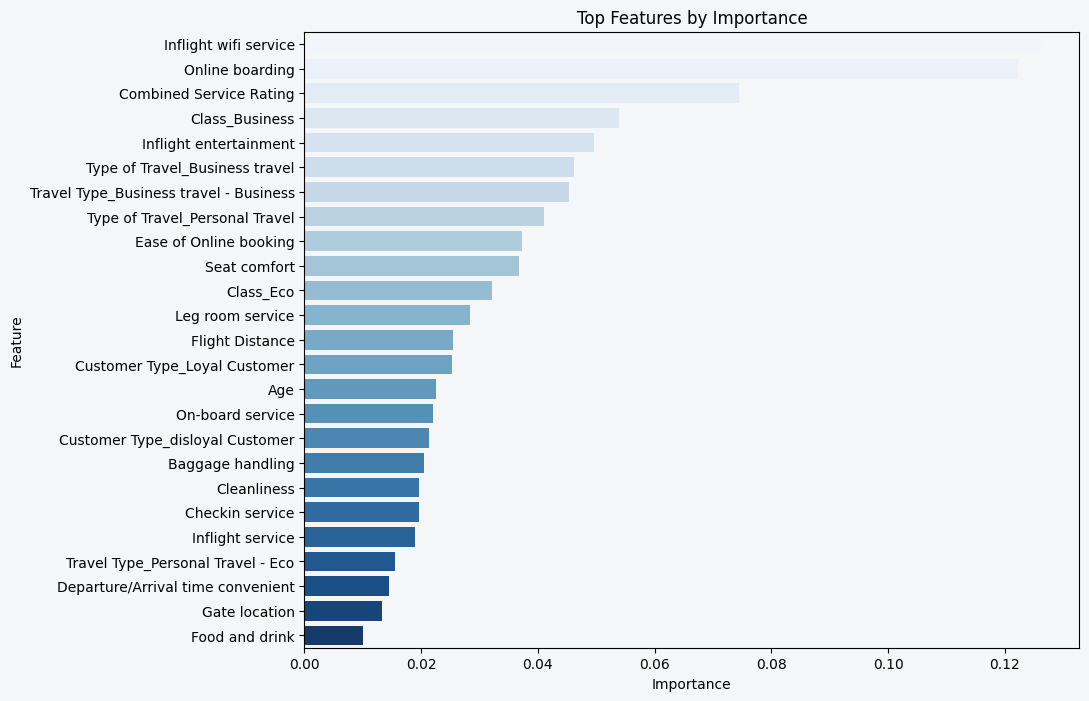

In [43]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sample data preparation
# df = pd.read_csv('your_data.csv')  # Replace with your actual data source

# Example setup: Assuming you have a DataFrame `df` and a target column 'satisfaction'
X = df.drop(columns='satisfaction')
y = df['satisfaction']

# Encode categorical variables if necessary
X = pd.get_dummies(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top features by importance:")
print(feature_importances.head(10))  # Adjust the number to display more features if needed

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(25), palette='Blues')
plt.title('Top Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Ensure the axes are visible
#plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [44]:
df_ord

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance Inflight wifi service  \
0                 460.0                  Good   
1                 235.0                  Good   
2                1142.0               Average   
3                 562.0               Average   
4                 214.0                  Good   
...                 ...                   ...   
103899            192.0               Average   
103900           2347.0             Excellent   
103901           1995.0                  Poor   
103902           1000.0                  Poor   
103903           1723.0                  Poor   

       Departure/Arrival time convenient Ease of Online booking Gate location  \
0                              Excellent                   Good          Poor   
1                                Average                   Good          Good   
2                                Average                Average       Average   
3                            Outstanding            Outstanding   Outstanding   
4                                   Good                   Good          Good   
...                                  ...                    ...           ...   
103899                              Poor                Average          Good   
103900                         Excellent              Excellent     Excellent   
103901                              Poor                   Poor          Good   
103902                              Poor                   Poor   Outstanding   
103903                              Good                   Good          Good   

       Food and drink Online boarding Seat comfort Inflight entertainment  \
0         Outstanding            Good  Outstanding            Outstanding   
1                Poor            Good         Poor                   Poor   
2         Outstanding     Outstanding  Outstanding            Outstanding   
3             Average         Average      Average                Average   
4           Excellent     Outstanding  Outstanding                   Good   
...               ...             ...          ...                    ...   
103899        Average         Average      Average                Average   
103900        Average       Excellent  Outstanding            Outstanding   
103901      Excellent            Poor  Outstanding              Excellent   
103902           Poor            Poor         Poor                   Poor   
103903           Poor            Poor         Poor                   Poor   

       On-board service Leg room service Baggage handling Checkin service  \
0             Excellent             Good        Excellent       Excellent   
1                  Poor      Outstanding             Good            Poor   
2             Excellent             Good        Excellent       Excellent   
3               Average      Outstanding             Good            Poor   
4                  Good        Excellent        Excellent            Good   
...                 ...              ...              ...             ...   
103899             Good             Poor        Excellent         Average   
103900      Outstanding      Outstanding                5     Outstanding   

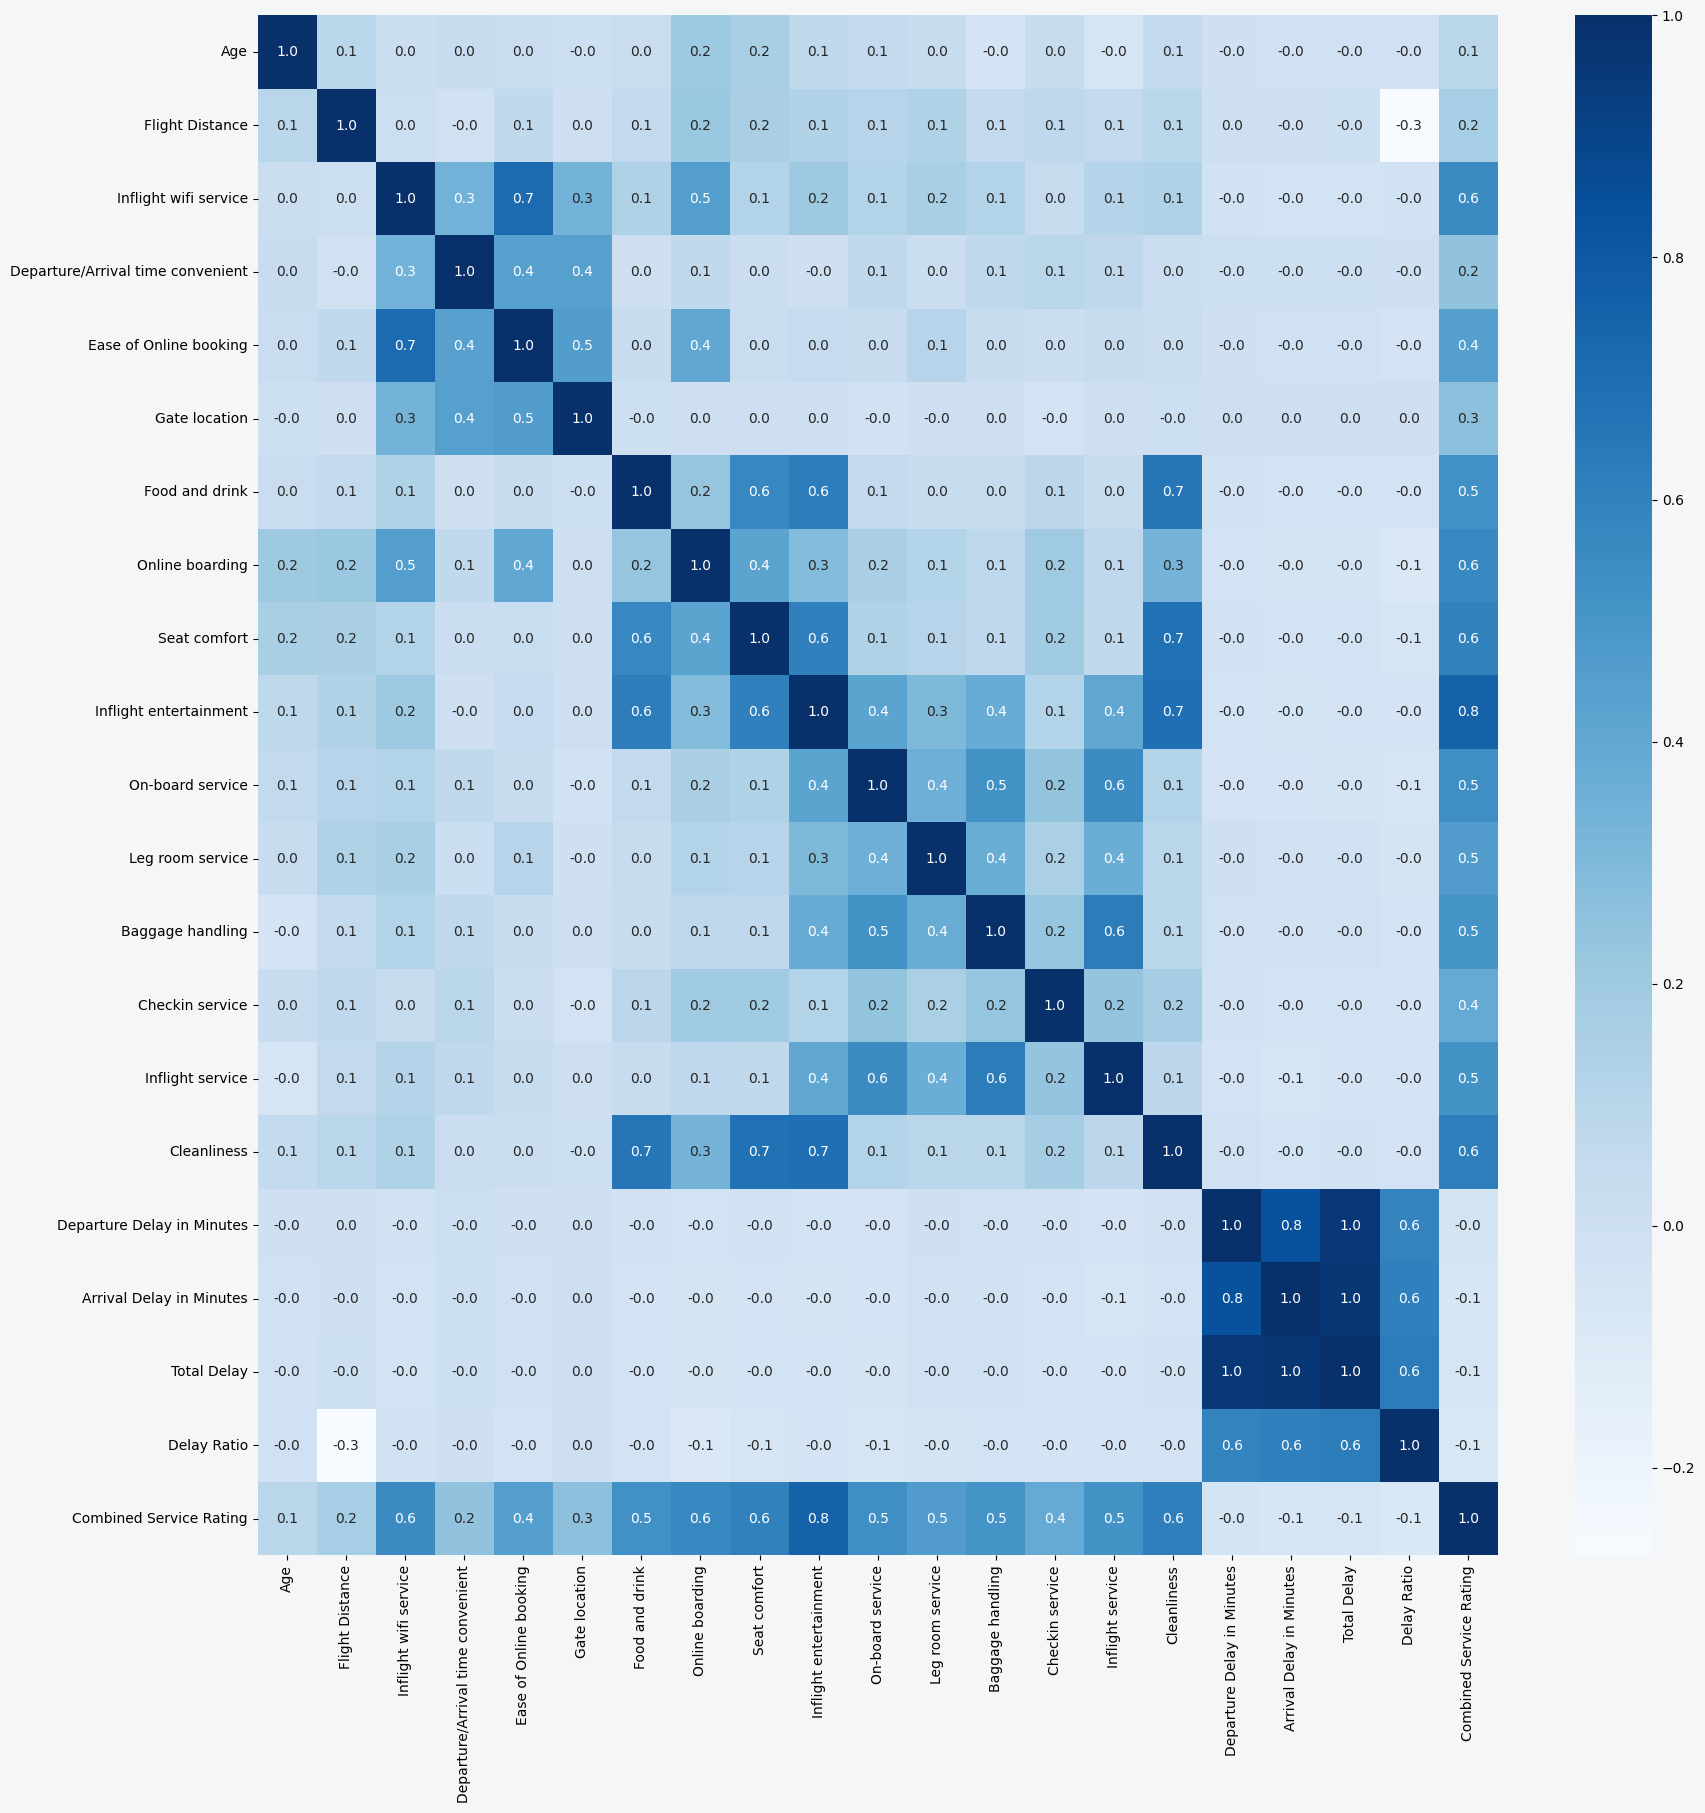

In [45]:
numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
plt.figure(figsize=(20, 20))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True,cmap="Blues", fmt='.1f')
plt.savefig('plot10.png', dpi=300, bbox_inches='tight')
plt.show()

In [46]:


# Assuming 'df' is your dataframe
corr_matrix = df[numeric_cols].corr()

# Filter out correlations less than or equal to 0.6 and keep only the upper triangle
corr_filtered = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
columns_above_threshold = [col for col in corr_filtered.columns if any(corr_filtered[col] > 0.8)]

# Print the columns
print(columns_above_threshold)


['Arrival Delay in Minutes', 'Total Delay']


In [47]:
df=df.drop(['Arrival Delay in Minutes','Total Delay'],axis=1)

In [48]:
df.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'satisfaction',
       'Age Group', 'Travel Type', 'Delay Ratio', 'Combined Service Rating'],
      dtype='object')

In [49]:
df = pd.get_dummies(df, drop_first=True,dtype=int)

In [50]:
df

Age  Flight Distance  Inflight wifi service  \
0        13            460.0                      3   
1        25            235.0                      3   
2        26           1142.0                      2   
3        25            562.0                      2   
4        61            214.0                      3   
...     ...              ...                    ...   
103899   23            192.0                      2   
103900   49           2347.0                      4   
103901   30           1995.0                      1   
103902   22           1000.0                      1   
103903   27           1723.0                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  Food and drink  Online boarding  Seat comfort  \
0                   1               5                3             5   
1                   3               1                3             1   
2                   2               5                5             5   
3                   5               2                2             2   
4                   3               4                5             5   
...               ...             ...              ...           ...   
103899              3               2                2             2   
103900              4               2                4             5   
103901              3               4                1             5   
103902              5               1                1             1   
103903              3               1                1             1   

        Inflight entertainment  On-board service  Leg room service  \
0                            5                 4                 3   
1                            1                 1                 5   
2                            5                 4                 3   
3                            2                 2                 5   
4                            3                 3                 4   
...                        ...               ...               ...   
103899                       2                 3                 1   
103900                       5                 5                 5   
103901                       4                 3                 2   
103902                       1                 4                 5   
103903                       1                 1                 1   

        Baggage handling  Checkin service  Inflight service  Cleanliness  \
0                      4                4                 5            5   
1                      3                1                 4            1   
2                      4                4                 4            5   
3                      3                1                 4            2   
4                      4                3                 3            3   
...                  ...              ...               ...          ...   
103899                 4                2                 3            2   
103900                 5                5                 5            4   
103901                 4                5                 5            4   
103902                 1                5           

In [51]:
#df = df.drop('satisfied',axis=1)

In [52]:
X = df.drop("satisfaction_satisfied",axis=1)
y = df["satisfaction_satisfied"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from xgboost import XGBClassifier  # Import XGBoost
from sklearn.linear_model import LogisticRegression  # Import Logistic Regression

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),  # Add Logistic Regression
    'XGBoost': XGBClassifier(eval_metric='mlogloss')  # Add XGBoost
}

param_grids = {
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [5],
        'min_samples_split': [20],
        'min_samples_leaf': [5]
    },
    'Random Forest': {
        'n_estimators': [40,70],
        'max_depth': [5, 8],
        'min_samples_split': [15],
        'max_features': ['sqrt']
    },
    'Gradient Boosting': {
        'n_estimators': [30, 40],
        'learning_rate': [0.01, 0.03],
        'subsample': [0.8]
    },
    'Logistic Regression': {
        'C': [0.5912, 0.6, 0.61],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },

    'XGBoost': {  # Parameters for XGBoost
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 6],
        'colsample_bytree': [0.8, 1.0]
    }
}

scalers = {
    'Standard Scaler': StandardScaler(),
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}


In [54]:
from sklearn.metrics import classification_report, accuracy_score

best_models = {}
best_params = {}
best_scores = {}
grid_search_results = {}

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}: ")

    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=2, scoring='accuracy', verbose=2)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_
    best_params[model_name] = grid_search.best_params_
    best_scores[model_name] = grid_search.best_score_

    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}\n")
    grid_search_results[model_name] = grid_search.cv_results_



Running GridSearchCV for Decision Tree: 
Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.1s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.1s
[CV] END criterion=entropy, max_depth=5, min_samples_leaf=5, min_samples_split=20; total time=   0.1s
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best cross-validation accuracy for Decision Tree: 0.9037837540559863

Running GridSearchCV for Random Forest: 
Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_split=15, n_estimators=40; total time=   0.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_split=15, n_estimators=40; total time=   1.0s
[CV] END 

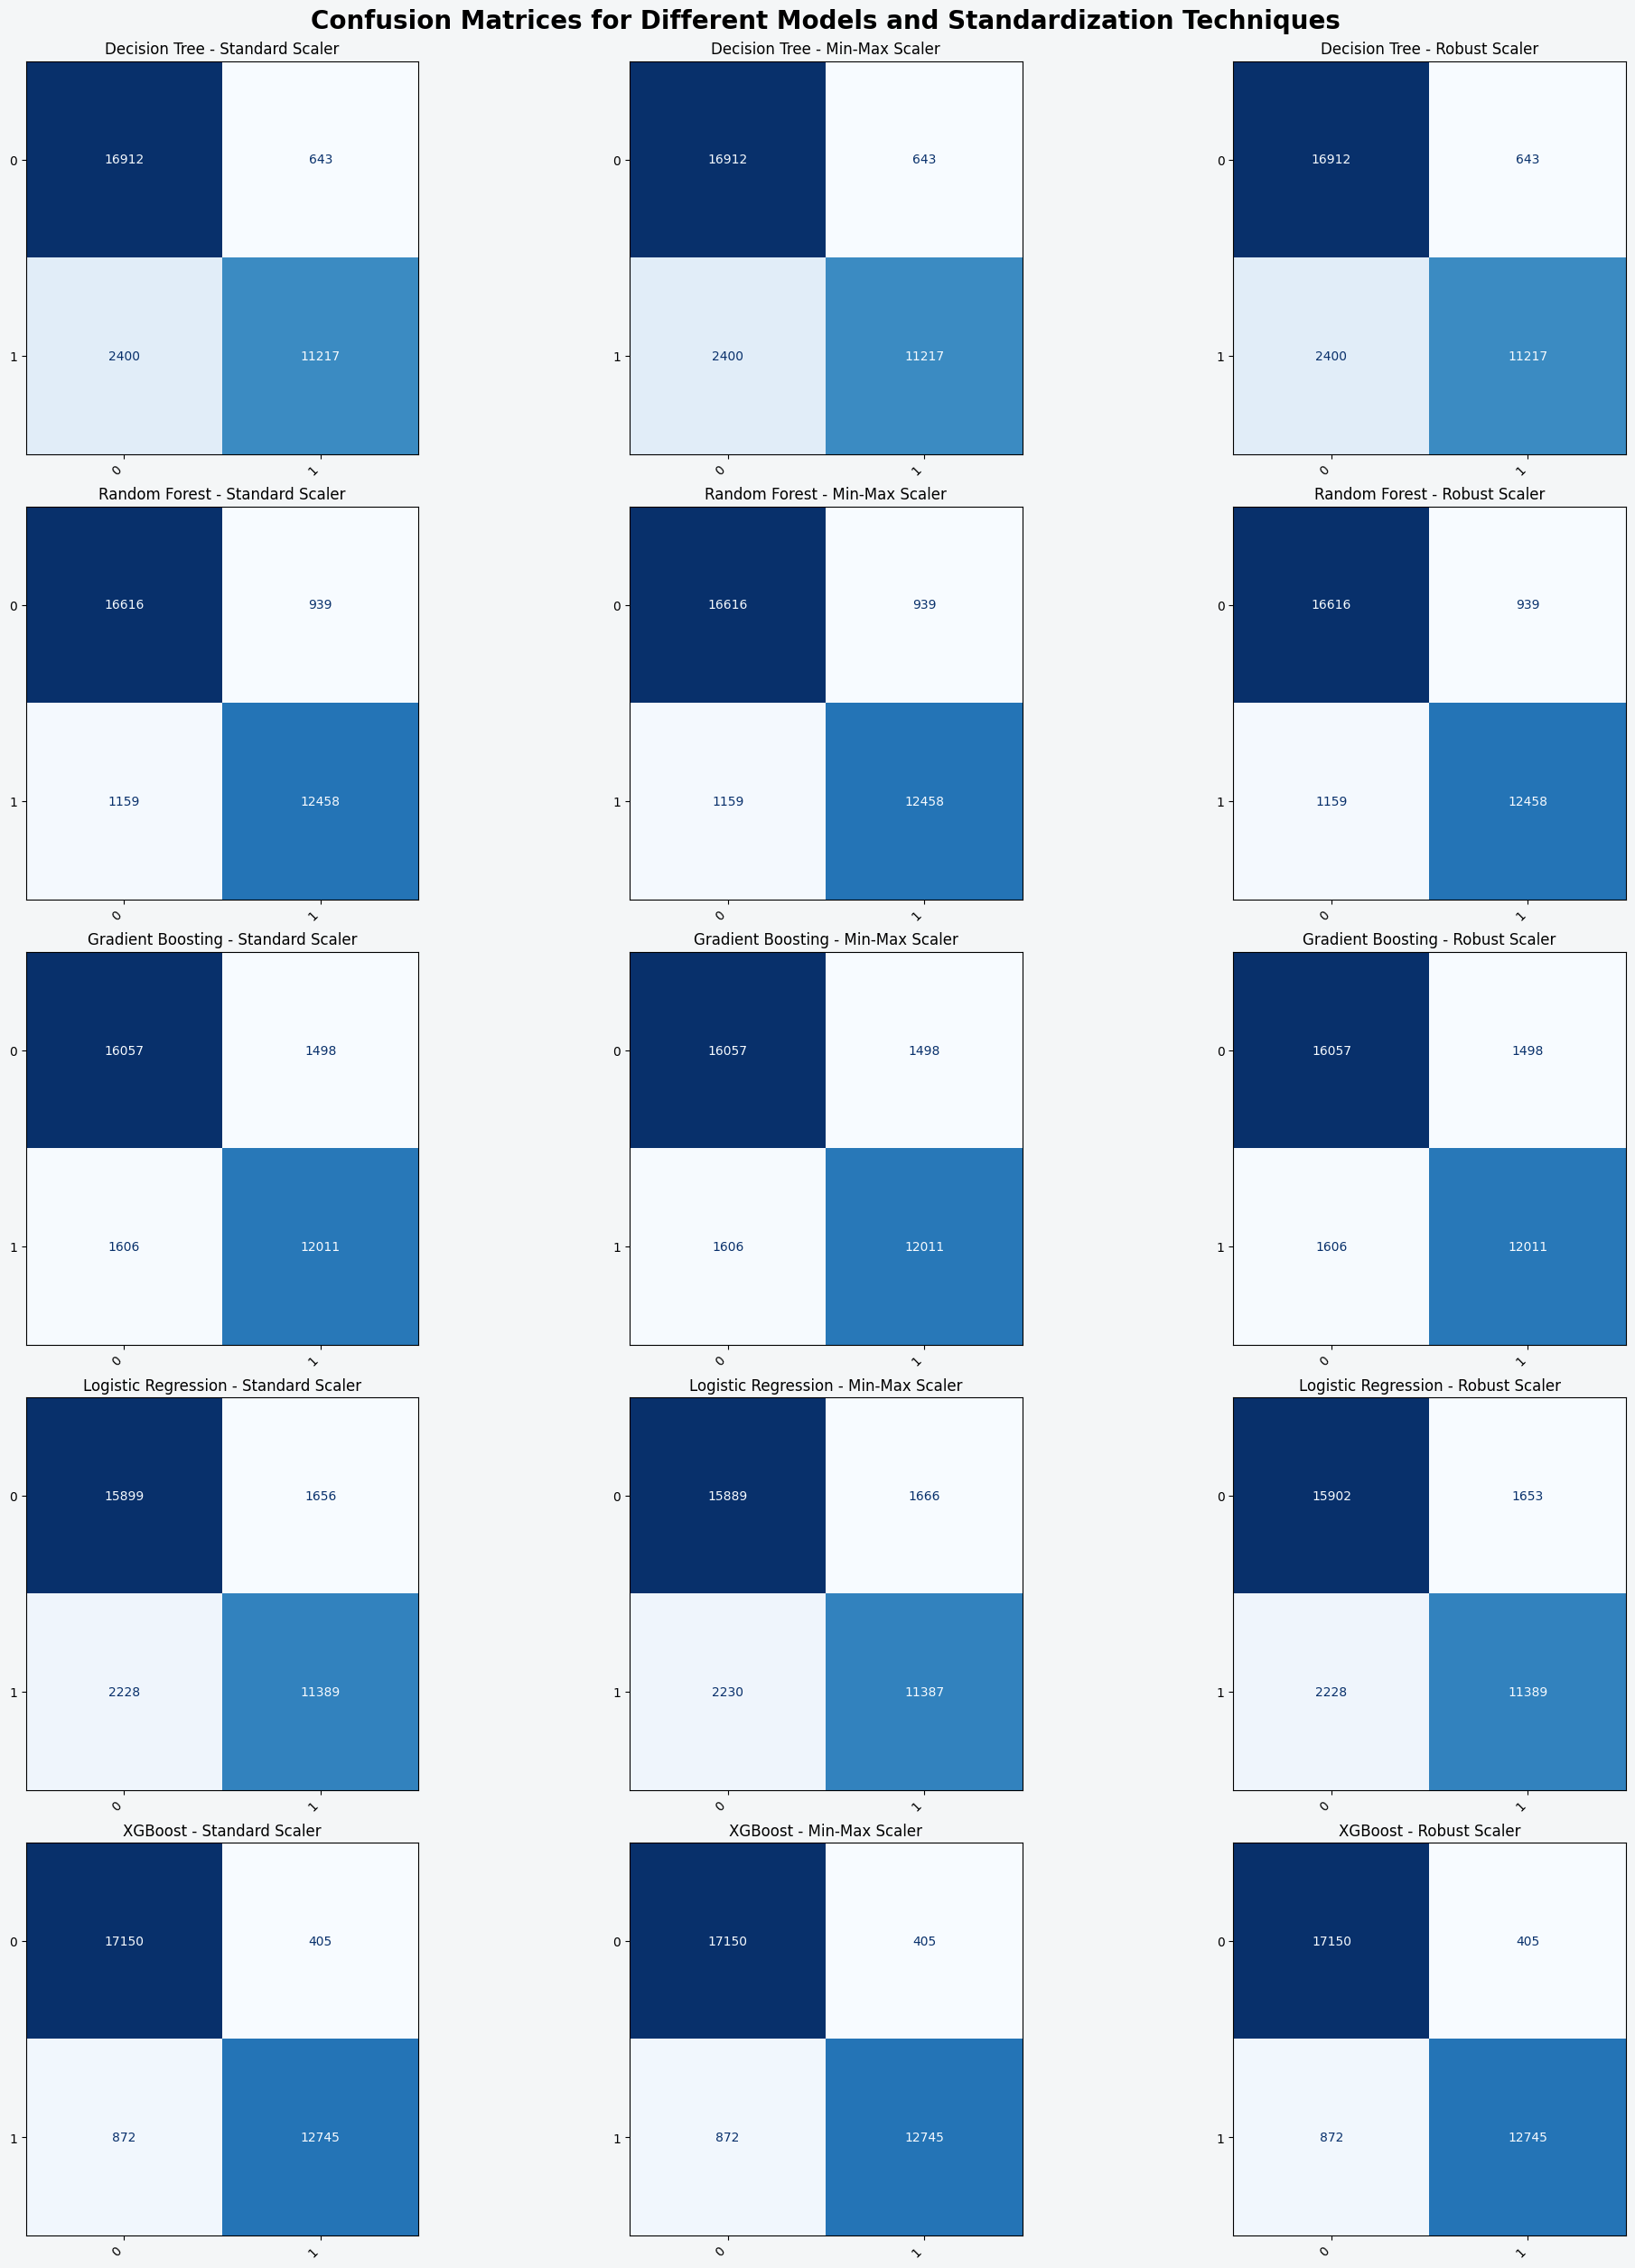

In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Define the best parameters for each model
best_params = {
    'Decision Tree': {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 20, 'min_samples_leaf': 5},
    'Random Forest': {'n_estimators': 40, 'max_depth': 8, 'min_samples_split': 20, 'min_samples_leaf': 15, 'max_features': 'sqrt'},
    'Gradient Boosting': {'n_estimators': 40, 'learning_rate': 0.03, 'subsample': 0.8},
    'Logistic Regression': {'C': 0.6, 'penalty': 'l2', 'solver': 'liblinear'},
    'XGBoost': {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100},
}

results_d = {
    'Model': [],
    'Scaler': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42, **best_params['Decision Tree']),
    'Random Forest': RandomForestClassifier(random_state=42, **best_params['Random Forest']),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, **best_params['Gradient Boosting']),
    'Logistic Regression': LogisticRegression(max_iter=1000, **best_params['Logistic Regression']),
    'XGBoost': XGBClassifier(eval_metric='mlogloss',**best_params['XGBoost'])

}

scalers = {
    'Standard Scaler': StandardScaler(),
    'Min-Max Scaler': MinMaxScaler(),
    'Robust Scaler': RobustScaler()
}

results = {model_name: {scaler_name: {'y_true': [], 'y_pred': []} for scaler_name in scalers.keys()} for model_name in models.keys()}

for model_name, model in models.items():
    for scaler_name, scaler in scalers.items():
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, y_train)

        y_test_pred = model.predict(X_test_scaled)

        train_acc = accuracy_score(y_train, model.predict(X_train_scaled))  # Accuracy on training data
        test_acc = accuracy_score(y_test, y_test_pred)

        results_d["Model"].append(model_name)
        results_d["Scaler"].append(scaler_name)
        results_d["Train Accuracy"].append(train_acc)
        results_d["Test Accuracy"].append(test_acc)
        results[model_name][scaler_name]['y_true'] = y_test
        results[model_name][scaler_name]['y_pred'] = y_test_pred

# Plot confusion matrices
num_models = len(models)
num_scalers = len(scalers)

fig, axes = plt.subplots(num_models, num_scalers, figsize=(20, num_models * 5), constrained_layout=True)

for i, (model_name, _) in enumerate(models.items()):
    for j, (scaler_name, _) in enumerate(scalers.items()):
         ax = axes[i, j]
         y_test = results[model_name][scaler_name]['y_true']
         y_pred = results[model_name][scaler_name]['y_pred']

         cm = confusion_matrix(y_test, y_pred)
         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
         disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)

         ax.set_title(f'{model_name} - {scaler_name}')
         ax.set_xlabel('')
         ax.set_ylabel('')
         ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.suptitle('Confusion Matrices for Different Models and Standardization Techniques', fontsize=20, weight='bold')
plt.savefig('plot15.png', dpi=300, bbox_inches='tight')
plt.show()


In [56]:
 pd.DataFrame(results_d)

Model           Scaler  Train Accuracy  Test Accuracy
0         Decision Tree  Standard Scaler        0.903399       0.902380
1         Decision Tree   Min-Max Scaler        0.903399       0.902380
2         Decision Tree    Robust Scaler        0.903399       0.902380
3         Random Forest  Standard Scaler        0.934004       0.932696
4         Random Forest   Min-Max Scaler        0.934004       0.932696
5         Random Forest    Robust Scaler        0.934004       0.932696
6     Gradient Boosting  Standard Scaler        0.901598       0.900423
7     Gradient Boosting   Min-Max Scaler        0.901598       0.900423
8     Gradient Boosting    Robust Scaler        0.901598       0.900423
9   Logistic Regression  Standard Scaler        0.875543       0.875401
10  Logistic Regression   Min-Max Scaler        0.875502       0.875016
11  Logistic Regression    Robust Scaler        0.875612       0.875497
12              XGBoost  Standard Scaler        0.963936       0.959034
13              XGBoost   Min-Max Scaler        0.963936       0.959034
14              XGBoost    Robust Scaler        0.963936       0.959034

XGBoost with Robust Scaler:
  Train Accuracy: 0.9639
  Test Accuracy: 0.9590


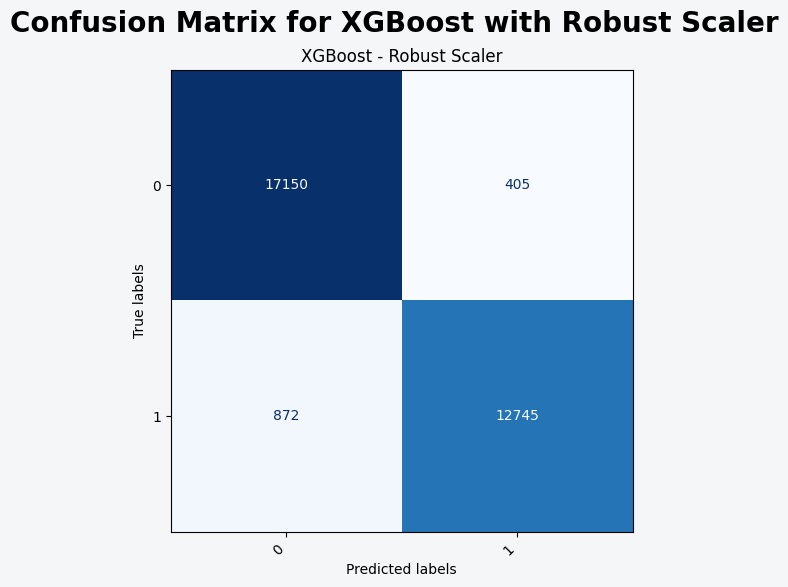

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Extract the relevant data for XGBoost with Robust Scaler
model_name = 'XGBoost'
scaler_name = 'Robust Scaler'

# Retrieve true and predicted values
y_test = results[model_name][scaler_name]['y_true']
y_pred = results[model_name][scaler_name]['y_pred']

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=models[model_name].classes_)

# Compute accuracies
train_acc = accuracy_score(y_train, models[model_name].predict(scaler.transform(X_train)))
test_acc = accuracy_score(y_test, y_pred)

# Print accuracies
print(f'{model_name} with {scaler_name}:')
print(f'  Train Accuracy: {train_acc:.4f}')
print(f'  Test Accuracy: {test_acc:.4f}')

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues', values_format='d', colorbar=False)

ax.set_title(f'{model_name} - {scaler_name}')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Save and show the plot
plt.suptitle('Confusion Matrix for XGBoost with Robust Scaler', fontsize=20, weight='bold')
plt.savefig('xgboost_robust_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [58]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)

              precision    recall  f1-score   support

     Class 0       0.95      0.98      0.96     17555
     Class 1       0.97      0.94      0.95     13617

    accuracy                           0.96     31172
   macro avg       0.96      0.96      0.96     31172
weighted avg       0.96      0.96      0.96     31172



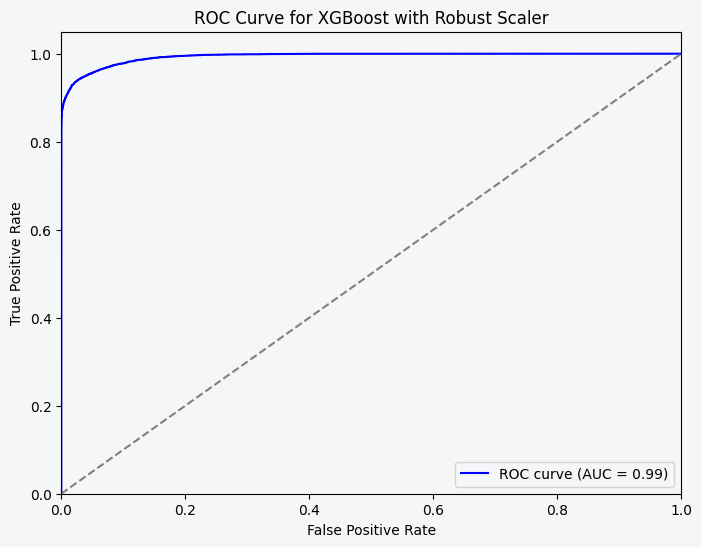

In [59]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
y_prob = models[model_name].predict_proba(scaler.transform(X_test))[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve for {model_name} with {scaler_name}')
plt.legend(loc='lower right')

# Save and show the plot
plt.savefig('xgboost_robust_roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()


<a id="passenger-satisfaction"></a>
<h2 style="text-align: center; font-family: 'Georgia', serif; font-weight: bold; color: #0B3D91; background-color: #E3F2FD; padding: 15px; border-radius: 8px;">
  ✈️ Predicting Passenger Satisfaction
</h2>

<ul style="font-family: 'Georgia', serif; font-size: 16px; color: #333; background-color: #F0F8FF; padding: 15px; border-radius: 8px; list-style-type: none; border: 1px solid #0B3D91;">
  <li><strong>Improve Services:</strong></li>
  <ul>
    <li>Understanding what makes passengers Satisfy or not helps companies fix problems and enhance their services, resulting in Satisfy customers.</li>
  </ul>
  
  <li><strong>Handle Complaints Quickly:</strong></li>
  <ul>
    <li>The model identifies not_Satisfied passengers early, allowing companies to address issues before they lead to negative reviews.</li>
  </ul>
  
  <li><strong>Use Resources Wisely:</strong></li>
  <ul>
    <li>Knowing what factors affect satisfaction helps companies invest in the areas that matter most, making their spending more effective.</li>
  </ul>
  
  <li><strong>Personalized Experience:</strong></li>
  <ul>
    <li>Predicting what passengers like or dislike helps companies offer personalized services that meet individual needs, improving overall satisfaction.</li>
  </ul>
</ul>
